# Inhaltsverzeichnis

- [1. Fragestellungen und Datenbeschaffung](#1-fragestellungen-und-datenbeschaffung)
  - [1.1 Fragestellung](#1-1-fragestellung)

- [2. Unsere Rohdaten](#2-unsere-rohdaten)

- [3. Pivottabelle](#3-pivottabelle)

- [4 Daten vorbereiten](#4-daten-vorbereiten)
  - [4.1 Überblick: Format des Datensatzes und Spaltenstruktur](#4-1-ueberblick-format-des-datensatzes-und-spaltenstruktur)
  - [4.1.1 Format des Datensatzes & Spaltenstruktur](#4-1-1-format-des-datensatzes-und-spaltenstruktur)
  - [4.1.2 Struktur und Qualität des Datensatzes](#4-1-2-struktur-und-qualitaet-des-datensatzes)
  - [4.2 Statistische Übersicht](#4-2-statistische-uebersicht)
  - [4.3 Long-Format vs. Wide-Format (Pivot)](#4-3-long-format-vs-wide-format-pivot)
  - [4.3.1 Das Long Format](#4-3-1-das-long-format)
  - [4.3.2 Wide-Format: Jahre als Spalten](#4-3-2-wide-format-jahre-als-spalten)
  - [4.4 Datentypen prüfen](#4-4-datentypen-pruefen)

- [5 Statistik der Rohdaten](#toc-5-statistik-der-rohdaten)
  - [5.1 Charakterisierung der Variablen](#toc-5-1-charakterisierung-der-variablen)
  - [5.1.1 Kontinuierlich oder Diskret?](#toc-5-1-1-kontinuierlich-oder-diskret)
  - [5.1.2 Variablentypen](#toc-5-1-2-variablentypen)
  - [5.1.3 Anzahl Datenpunkte](#toc-5-1-3-anzahl-datenpunkte)
  - [5.2 Anzahl Datenpunkte](#toc-5-2-anzahl-datenpunkte)
  - [5.2.1 Datenpunkte für die bestimmten Variabeln](#toc-5-2-1-datenpunkte-fuer-die-bestimmten-variabeln)
  - [5.2.2 Wo fehlen Datenpunkte?](#toc-5-2-2-wo-fehlen-datenpunkte)
  - [5.2.3 Prozentualer Anteil fehlender Werte](#toc-5-2-3-prozentualer-anteil-fehlender-werte)
  - [5.3 Wie ist die Verteilung der zu untersuchenden Variabel](#toc-5-3-wie-ist-die-verteilung-der-zu-untersuchenden-variabel)
  - [5.3.1 Histogramm (Verteilung der Unterernährungsrate)](#toc-5-3-1-histogramm-verteilung-der-unterernaehrungsrate)
  - [5.3.2 Boxplot (Ausreisser und Quartile)](#toc-5-3-2-boxplot-ausreisser-und-quartile)
  - [5.3.3 Säulendiagramm für Anzahl Datenpunkte pro Jahr](#toc-5-3-3-saeulendiagramm-fuer-anzahl-datenpunkte-pro-jahr)

- [6 Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)](#toc-6-zusammenhaenge-zwischen-zwei-variabeln-streuungsdiagramm-korrelationsmatrix)
  - [6.1 Streudiagramm (Scatterplot)](#toc-6-1-streudiagramm-scatterplot)
  - [6.2 Korrelationsmatrix](#toc-6-2-korrelationsmatrix)

- [7 Untersuchung der Fragestellung](#toc-7-untersuchung-der-fragestellung)
  - [Fragestellung 1: Wie hat sich der weltweite Anteil unterernährter Menschen im Laufe der Zeit entwickelt?](#toc-fragestellung-1-wie-hat-sich-der-weltweite-anteil-unterernaehrter-menschen-im-laufe-der-zeit-entwickelt)
  - [Fragestellung 2: Welche 6 Länder sind im Jahr 2022 am stärksten von Unterernährung betroffen?](#toc-fragestellung-2-welche-6-laender-sind-im-jahr-2022-am-staerksten-von-unterernaehrung-betroffen)
  - [Fragestellung 3: Welche 6 Länder sind im Jahr 2022 am niedrigsten von Unterernährung betroffen?](#toc-fragestellung-3-welche-6-laender-sind-im-jahr-2022-am-niedrigsten-von-unterernaehrung-betroffen)
  - [Fragestellung 4: Gibt es einen Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren?](#toc-fragestellung-4-gibt-es-einen-zusammenhang-zwischen-unterernaehrung-und-wirtschaftlichen-faktoren)
  - [Fragestellung 5: Gibt es Länder, in denen die Unterernährungsrate besonders stark gesunken oder gestiegen sind?](#toc-fragestellung-5-gibt-es-laender-in-denen-die-unterernaehrungsrate-besonders-stark-gesunken-oder-gestiegen-sind)

---

Hinweis: Wir haben für die Abschnitte 5–7 stabile `toc-...` Anker gesetzt und die TOC-Links aktualisiert, damit die Sprünge zuverlässiger funktionieren.

<a id="1-fragestellungen-und-datenbeschaffung"></a>
## 1. Fragestellungen und Datenbeschaffung

<a id="1-1-fragestellung"></a>
### 1.1 Fragestellung:

1. Wie hat sich der weltweite Anteil unterernährter Menschen im Laufe der Zeit entwickelt?
2. Welche 6 Länder sind im Jahr 2022 am stärksten von Unterernährung betroffen?
3. Welche 6 Länder sind im Jahr 2022 am niedrigsten von Unterernährung betroffen?
4. Gibt es einen Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren?
5. Gibt es Länder, in denen die Unterernährungsrate besonders stark gesunken oder gestiegen sind?


<a id="2-unsere-rohdaten"></a>
## 2. Unsere Rohdaten

In [1]:
import pandas as pd
import zipfile

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

old_col_name = next(col for col in df.columns 
                    if "Prevalence of undernourishment" in col)

df = df.rename(columns={old_col_name: "Prevalence (%)"})

df.head()

,Entity,Code,Year,Prevalence (%)
0,Afghanistan,AFG,2001,46.0
1,Afghanistan,AFG,2002,43.7
2,Afghanistan,AFG,2003,38.6
3,Afghanistan,AFG,2004,35.9
4,Afghanistan,AFG,2005,34.2


<a id="3-pivottabelle"></a>
## 3. Pivottabelle 

In [2]:
import pandas as pd
import zipfile

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

try:
    with zipfile.ZipFile(zip_path) as z:
        with z.open(file_name) as f:
            df = pd.read_csv(f)
except FileNotFoundError:
    raise

old_col_name = next((col for col in df.columns if "Prevalence of undernourishment" in col), None)

if old_col_name:
    df = df.rename(columns={old_col_name: "Prevalence (%)"})

df['Prevalence (%)'] = pd.to_numeric(df['Prevalence (%)'], errors='coerce').fillna(0)

df_pivot = df.pivot_table(
    index='Entity',
    columns='Year',
    values='Prevalence (%)',
    aggfunc='mean'
)

pd.set_option('display.max_rows', 50)
pd.reset_option('display.max_columns')

df_pivot

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,46.0,43.7,38.6,35.9,34.2,31.6,28.3,25.1,21.6,...,19.3,20.0,20.5,21.4,22.6,25.1,27.7,29.4,30.4,NaN
Africa (FAO),22.9,22.2,21.8,21.5,21.0,19.9,18.8,18.3,17.5,17.0,...,15.5,16.0,16.8,16.7,17.1,17.4,18.8,19.3,19.9,20.4
Albania,NaN,4.9,6.0,7.4,8.6,8.9,8.9,8.4,7.4,6.2,...,4.5,4.4,4.3,4.3,4.2,4.3,4.4,4.3,4.5,NaN
Algeria,NaN,7.5,6.8,6.5,6.5,6.2,6.0,5.5,5.2,4.8,...,2.7,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5,NaN
Americas (FAO),6.5,6.3,6.6,6.0,5.9,5.6,5.2,5.0,4.6,4.6,...,3.2,3.3,3.8,3.6,3.7,3.6,4.1,4.4,4.2,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Europe (FAO),2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
World,12.8,12.9,13.2,12.9,12.7,12.2,11.2,10.1,9.5,9.2,...,7.3,7.7,7.6,7.1,7.2,7.5,8.5,9.0,9.1,9.1
Yemen,NaN,24.4,25.3,25.7,26.0,25.5,24.4,23.8,23.7,22.2,...,32.4,38.1,41.3,42.0,40.2,38.4,36.7,36.9,39.5,NaN


Mithilfe dieser Tabelle werden wir auch unsere Diagramme erstellen

<a id="4-daten-vorbereiten"></a>
## 4 Daten vorbereiten

<a id="4-1-ueberblick-format-des-datensatzes-und-spaltenstruktur"></a>
### 4.1 Überblick: Format des Datensatzes und Spaltenstruktur

<a id="4-1-1-format-des-datensatzes-und-spaltenstruktur"></a>
#### 4.1.1 Format des Datensatzes & Spaltenstruktur

In [3]:
print("Spalten im Datensatz:")
print(list(df.columns))

print("\nDatentypen der Spalten:")
print(df.dtypes)

print("\nErste 5 Zeilen des DataFrames:")
df.head()

Spalten im Datensatz:
['Entity', 'Code', 'Year', 'Prevalence (%)']

Datentypen der Spalten:
Entity             object
Code               object
Year                int64
Prevalence (%)    float64
dtype: object

Erste 5 Zeilen des DataFrames:


,Entity,Code,Year,Prevalence (%)
0,Afghanistan,AFG,2001,46.0
1,Afghanistan,AFG,2002,43.7
2,Afghanistan,AFG,2003,38.6
3,Afghanistan,AFG,2004,35.9
4,Afghanistan,AFG,2005,34.2


Die ersten fünf Zeilen unseres DataFrames geben einen schnellen Überblick über den Aufbau des Datensatzes. Der Datensatz enthält für jedes Land bzw. jede Region den Ländercode, das zugehörige Jahr sowie den Anteil der unterernährten Bevölkerung. Die Daten sind chronologisch nach Jahren geordnet, innerhalb eines Jahres erscheinen die Länder alphabetisch. Dadurch lässt sich die Struktur des Datensatzes klar erkennen und eine erste Einschätzung der Werte ist möglich.

<a id="4-1-2-struktur-und-qualitaet-des-datensatzes"></a>
#### 4.1.2 Struktur und Qualität des Datensatzes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          4683 non-null   object 
 1   Code            3843 non-null   object 
 2   Year            4683 non-null   int64  
 3   Prevalence (%)  4683 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 146.5+ KB


Die Funktion df.info() liefert eine kompakte Übersicht über die Struktur und Qualität des Datensatzes. Sie zeigt die Spaltennamen, die jeweiligen Datentypen sowie die Anzahl der vorhandenen Werte pro Spalte. Dadurch wird sichtbar, dass fast alle Variablen vollständig vorliegen – mit Ausnahme des Ländercodes („Code“), bei dem einige Werte fehlen. Zusätzlich gibt die Ausgabe Informationen zur Gesamtzahl der Einträge und zum Speicherverbrauch des DataFrames, was eine erste Einschätzung der Datenqualität ermöglicht.

*Grösse und Umfang*

*Anzahl der Einträge:*

- Der DataFrame umfasst insgesamt 4683 Beobachtungen (Zeilen).
- Die Zeilen sind fortlaufend von 0 bis 4 682 nummeriert.
- Der Datensatz enthält 4 Variablen (Spalten): Entity, Code, Year und Prevalence (%).

*Datenqualität (Fehlwerte)*

*Fehlende Daten*

- Die Spalte Code enthält nur 3843 Nicht-Null-Einträge. Da es insgesamt 4683 Zeilen gibt, fehlen in dieser Spalte 840 Werte (4683 - 3843 = 840).

Folgerung: Diese fehlenden Werte in der Länderkodierung müssen vor einer Analyse, die den Code benötigt, überprüft werden. 
Vollständige Daten: Die Spalten Entity, Year und Prevalence (%) sind vollständig 4683 non-null und weisen keine NULL-Werte auf.

In [5]:
print(df.isnull().sum())
print("\nGesamt fehlende Werte:", df.isnull().sum().sum())

Entity              0
Code              840
Year                0
Prevalence (%)      0
dtype: int64

Gesamt fehlende Werte: 840


<a id="4-2-statistische-uebersicht"></a>
### 4.2 Statistische Übersicht

In [6]:
df.describe()[['Year', 'Prevalence (%)']]

,Year,Prevalence (%)
count,4683.000000,4683.000000
mean,2011.511211,11.057015
std,6.461964,10.785757
min,2000.000000,2.500000
25%,2006.000000,2.500000
50%,2012.000000,6.600000
75%,2017.000000,16.000000
max,2023.000000,71.400000


Die Funktion df.describe() liefert eine Zusammenfassung der Zahlen: Year und Prevalence (%). Daraus wird veranschaulicht, dass der Datensatz Messwerte aus den Jahren 2000 bis 2023 enthält (Median: 2012). Die Prävalenz der Unterernährung reicht von 2.5 % bis 71.4 %, mit einem Median von 6.6 %. Die Quartilswerte (25 %, 50 %, 75 %) zeigen, dass die meisten Länder zwischen 2.5 % und 16 % liegen, während wenige Länder deutlich höhere Werte aufweisen. Damit bietet die Übersicht einen schnellen Einblick in die zeitliche Spannweite sowie die Verteilung und Streuung der Unterernährungswerte im Datensatz.

*1. Spalte:Year (Jahr)*
- Umfang (Count): 4683 Einträge. Die Daten sind für alle Zeilen vollständig.
- Zeitraum (Min/Max): Die Beobachtungen umfassen einen Zeitraum von 2000 bis 2023.
- Mittelwert (Mean): Der Durchschnitt aller aufgezeichneten Jahre liegt bei ≈ 2011,5.

*2. Spalte:Prevalence (%) (Prävalenz der Unterernährung)*

*Diese Spalte zeigt eine hohe Variabilität und deutet auf eine ungleiche Verteilung hin:*

-   Umfang (Count): 4683 Einträge (vollständig)
-   Mittelwert (Mean): Die durchschnittliche Prävalenz aller Beobachtungen liegt bei ≈11,06%.
-   Spannweite (Min / Max): Die Prävalenz reicht von einem Minimum von 2,5% bis zu einem extremen Maximum von 71,4%.
-- Standardabweichung (Std): Mit 10,79 ist die Standardabweichung sehr hoch im Vergleich zum Mittelwert (11,06), was auf eine sehr weite Streuung der Daten hinweist.

<a id="4-3-long-format-vs-wide-format-pivot"></a>
### 4.3 Long-Format vs. Wide-Format (Pivot)

<a id="4-3-1-das-long-format"></a>
#### 4.3.1 Das Long Format

In [7]:
print("-Long-Format: Original-")
print(df.head())

-Long-Format: Original-
        Entity Code  Year  Prevalence (%)
0  Afghanistan  AFG  2001            46.0
1  Afghanistan  AFG  2002            43.7
2  Afghanistan  AFG  2003            38.6
3  Afghanistan  AFG  2004            35.9
4  Afghanistan  AFG  2005            34.2


Der Datensatz liegt bereits im Long-Format vor. Das bedeutet, dass jede Zeile eine einzelne Beobachtung darstellt – bestehend aus einem Land (Entity), dem Ländercode (Code), einem Jahr sowie dem dazugehörigen Wert der Unterernährungsprävalenz. Die ersten fünf Zeilen zeigen exemplarisch diese Struktur. Dieses Format eignet sich besonders gut für Zeitreihenanalysen und Visualisierungen, da jede Kombination aus Land und Jahr separat aufgeführt ist und damit problemlos gruppiert, gefiltert oder aggregiert werden kann.

<a id="4-3-2-wide-format-jahre-als-spalten"></a>
#### 4.3.2 Wide-Format: Jahre als Spalten

In [8]:
df_wide = df.pivot(index='Entity', columns='Year', values='Prevalence (%)')
print("- Wide-Format: Pivotiert nach Jahr -")
print(df_wide.head())

- Wide-Format: Pivotiert nach Jahr -
Year            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Entity                                                                       
Afghanistan      NaN  46.0  43.7  38.6  35.9  34.2  31.6  28.3  25.1  21.6   
Africa (FAO)    22.9  22.2  21.8  21.5  21.0  19.9  18.8  18.3  17.5  17.0   
Albania          NaN   4.9   6.0   7.4   8.6   8.9   8.9   8.4   7.4   6.2   
Algeria          NaN   7.5   6.8   6.5   6.5   6.2   6.0   5.5   5.2   4.8   
Americas (FAO)   6.5   6.3   6.6   6.0   5.9   5.6   5.2   5.0   4.6   4.6   

Year            ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  \
Entity          ...                                                         
Afghanistan     ...  19.3  20.0  20.5  21.4  22.6  25.1  27.7  29.4  30.4   
Africa (FAO)    ...  15.5  16.0  16.8  16.7  17.1  17.4  18.8  19.3  19.9   
Albania         ...   4.5   4.4   4.3   4.3   4.2   4.3   4.4   4.3   4.5   
Algeria         ...   2.7   2.6

Durch die Pivotierung wird der Datensatz in das Wide-Format überführt. Dabei bildet jede Entität (Land) eine eigene Zeile, während die einzelnen Jahre als Spalten angeordnet sind. In jeder Zelle steht der jeweilige Wert der Unterernährungsprävalenz für ein bestimmtes Land und Jahr. Das Ergebnis ist eine matrixartige Darstellung, die zeitliche Entwicklungen auf einen Blick sichtbar macht und direkte Vergleiche zwischen Ländern erleichtert. Dieses Format ist besonders hilfreich für Visualisierungen oder für tabellarische Gegenüberstellungen über mehrere Jahre hinweg.

<a id="4-4-datentypen-pruefen"></a>
### 4.4 Datentypen prüfen

<a id="4-4-1-datentypen"></a>
#### 4.4.1 Datentypen

In [9]:
df.dtypes

Entity             object
Code               object
Year                int64
Prevalence (%)    float64
dtype: object

Die Ausgabe zeigt die Datentypen der einzelnen Spalten in deinem DataFrame:

Entity → object (Text/String, z. B. Ländername)

Code → object (Text/String, z. B. Ländercode)

Year → int64 (Ganzzahlen, z. B. Jahreszahlen)

Prevalence (%) → float64 (Dezimalzahlen, z. B. Prozentwerte)

Damit wissen wir genau, welche Spalten numerisch sind und welche als Text behandelt werden, was wichtig für Berechnungen oder Visualisierungen ist.

<a id="toc-5-statistik-der-rohdaten"></a>
## 5 Statistik der Rohdaten

<a id="toc-5-1-charakterisierung-der-variablen"></a>
### 5.1 Charakterisierung der Variablen

#### 5.1.1 Variable: Prevalence (%) → kontinuierlich oder diskret?

In [10]:
print("Einige Werte der Prevalence (%)")
print(df['Prevalence (%)'].head())

Einige Werte der Prevalence (%)
0    46.0
1    43.7
2    38.6
3    35.9
4    34.2
Name: Prevalence (%), dtype: float64


Diese Python-Funktion zeigt die ersten fünf Datenpunkte der Variablen „Prevalence (%)“ aus dem DataFrame. Die Ausgabe bestätigt, dass der Datentyp float64 ist, was auf eine kontinuierliche Variable hindeutet.

#### 5.1.2 Für Entity und Year prüfen, wie viele einzigartige Werte es gibt

In [11]:
print("\nAnzahl einzigartiger Länder (Entity):", df['Entity'].nunique())
print("Anzahl einzigartiger Jahre (Year):", df['Year'].nunique())


Anzahl einzigartiger Länder (Entity): 211
Anzahl einzigartiger Jahre (Year): 24


Die Ausgabe zeigt die Ergebnisse der Zählungen:

Anzahl einzigartiger Länder (Entity): 211
Dies bedeutet, dass der Datensatz Beobachtungen für 211 verschiedene Länder oder Entitäten enthält.

Anzahl einzigartiger Jahre (Year): 24
Dies bedeutet, dass die Daten über einen Zeitraum von insgesamt 24 verschiedenen Jahren erfasst wurden.

#### 5.1.3 Anzahl Datenpunkte pro Land

In [12]:
print("\nDatenpunkte pro Land:")
print(df['Entity'].value_counts())


Datenpunkte pro Land:
Entity
Africa (FAO)                                 24
Asia (FAO)                                   24
Americas (FAO)                               24
Eastern Asia (FAO)                           24
Eastern Asia and South-eastern Asia (FAO)    24
                                             ..
Uruguay                                      22
Yemen                                        22
North Korea                                  18
Sudan                                        10
South Sudan                                   3
Name: count, Length: 211, dtype: int64


Diese Funktion zeigt uns an, wieviele Datenpunkte alle Länder haben.

#### 5.1.4 Anzahl Datenpunkte pro Jahr

In [13]:
print("\nDatenpunkte pro Jahr:")
print(df['Year'].value_counts())


Datenpunkte pro Jahr:
Year
2017    210
2018    210
2020    210
2021    210
2013    210
2014    210
2015    210
2016    210
2022    210
2007    209
2006    209
2005    209
2004    209
2003    209
2002    209
2001    209
2008    209
2010    209
2011    209
2012    209
2009    209
2019    209
2000     38
2023     38
Name: count, dtype: int64


Die Werte zeigen, dass Prevalence (%) als kontinuierliche Variable vorliegt, während Entity und Year als diskrete Merkmale auftreten. Zudem wird sichtbar, wie viele Datenpunkte pro Land und pro Jahr vorhanden sind, was Rückschlüsse auf die Vollständigkeit der Zeitreihen einzelner Länder ermöglicht.

### 5.2 Anzahl einzigartiger Klassen pro diskreter Variable

#### 5.2.1 Diskrete Variablen: Entity, Code, Year

In [14]:
discrete_vars = ['Entity', 'Code', 'Year']

for col in discrete_vars:
    print(f"- Variable: {col} -")
    print("Anzahl einzigartiger Klassen:", df[col].nunique())
    print("\n")

- Variable: Entity -
Anzahl einzigartiger Klassen: 211


- Variable: Code -
Anzahl einzigartiger Klassen: 176


- Variable: Year -
Anzahl einzigartiger Klassen: 24




Der Code überprüft die Anzahl Klassen für die diskreten Variablen Entity, Code und Year. Das Ergebnis zeigt, dass es 211 unterschiedliche Länder (Entity), 176 verschiedene Ländercodes (Code) und 24 verschiedene Jahre (Year) im Datensatz gibt. Damit lässt sich erkennen, wie viele einzelne Kategorien jede dieser diskreten Variablen enthält, was wichtig für die Analyse der Datenverteilung ist.

In [15]:
discrete_vars = ['Entity', 'Code', 'Year']

for col in discrete_vars:
    print(f"- Variable: {col} -")
    print("Anzahl Datenpunkte pro Klasse:")
    print(df[col].value_counts())
    print("\n")

- Variable: Entity -
Anzahl Datenpunkte pro Klasse:
Entity
Africa (FAO)                                 24
Asia (FAO)                                   24
Americas (FAO)                               24
Eastern Asia (FAO)                           24
Eastern Asia and South-eastern Asia (FAO)    24
                                             ..
Uruguay                                      22
Yemen                                        22
North Korea                                  18
Sudan                                        10
South Sudan                                   3
Name: count, Length: 211, dtype: int64


- Variable: Code -
Anzahl Datenpunkte pro Klasse:
Code
OWID_PYA    24
OWID_WRL    24
OWID_MNS    24
AFG         22
ARG         22
            ..
VUT         22
ZWE         22
PRK         18
SDN         10
SSD          3
Name: count, Length: 176, dtype: int64


- Variable: Year -
Anzahl Datenpunkte pro Klasse:
Year
2017    210
2018    210
2020    210
2021    210
2013    

Der Code ermittelt die Anzahl der Datenpunkte pro Klasse für die diskreten Variablen Entity, Code und Year. Das Ergebnis zeigt, dass viele Länder bzw. Codes für alle Jahre vollständig vorliegen (z. B. 24 Datenpunkte), während einige Länder wie South Sudan nur wenige Werte haben (3 Datenpunkte), und bei den Jahren die Anzahl der Messwerte pro Jahr variiert. Damit wird ersichtlich, wie vollständig oder lückenhaft die Daten für jede Klasse sind, was bei der weiteren Analyse berücksichtigt werden sollte.

<a id="toc-5-2-1-datenpunkte-fuer-die-bestimmten-variabeln"></a>
### 5.3 Datenpunkte für die bestimmten Variabeln

#### 5.3.1 Gesamtanzahl der Zeilen (Datenpunkte)

In [16]:
print("Gesamtanzahl Datenpunkte:", len(df))

Gesamtanzahl Datenpunkte: 4683


Die Gesamtanzahl der Datenpunkte im DataFrame beträgt 4683.
Jede Zeile entspricht dabei einer einzelnen Beobachtung, also einem Messwert der Unterernährungsprävalenz für ein bestimmtes Land in einem bestimmten Jahr.
Diese Information liefert einen ersten Überblick über die Grösse und Dichte des Datensatzes und ist wichtig für die Planung weiterer statistischer Analysen und Visualisierungen.

#### 5.3.2 Anzahl nicht fehlender Werte pro Spalte

In [17]:
print("\nAnzahl vorhandener Datenpunkte pro Variable:")
print(df.count())


Anzahl vorhandener Datenpunkte pro Variable:
Entity            4683
Code              3843
Year              4683
Prevalence (%)    4683
dtype: int64


Die Ausgabe zeigt die Anzahl der vorhandenen Werte pro Spalte im DataFrame. Während Entity, Year und Prevalence (%) vollständig erfasst sind (4683 Werte), fehlen bei Code einige Einträge, da nur 3843 Werte vorliegen. Dies gibt einen Überblick über vollständige und fehlende Daten für jede Variable, was bei der Analyse berücksichtigt werden sollte.

#### 5.3.3 Fehlende Datenpunkte pro Variable: Anzahl fehlender Werte pro Spalte

In [18]:
missing_counts = df.isna().sum()
print("\nFehlende Datenpunkte pro Variable:")
print(missing_counts)


Fehlende Datenpunkte pro Variable:
Entity              0
Code              840
Year                0
Prevalence (%)      0
dtype: int64


Die Auswertung zeigt, in welchen Variablen fehlende Datenpunkte vorhanden sind. Während Entity, Year und Prevalence (%) vollständig erfasst sind, fehlen bei Code 840 Werte, was auf unvollständige Ländercodes hinweist. Diese Information ist wichtig, um bei Analysen oder Berechnungen fehlende Werte gezielt zu behandeln.

<a id="toc-5-2-3-prozentualer-anteil-fehlender-werte"></a>
#### 5.3.4 Prozentualer Anteil fehlender Werte

In [19]:
missing_percent = (df.isna().sum() / len(df)) * 100
print("\nProzentualer Anteil fehlender Werte pro Variable:")
print(missing_percent)


Prozentualer Anteil fehlender Werte pro Variable:
Entity             0.00000
Code              17.93722
Year               0.00000
Prevalence (%)     0.00000
dtype: float64


Der Code berechnet den prozentualen Anteil fehlender Werte für jede Variable im DataFrame. Während Entity, Year und Prevalence (%) vollständig sind (0 %), fehlen bei Code etwa 17,94 % der Einträge. Dies zeigt, dass insbesondere die Ländercodes unvollständig sind und bei der Analyse berücksichtigt oder bereinigt werden müssen.

#### 5.3.5 Grafische Darstellung: vorhandene vs. fehlende Datenpunkte

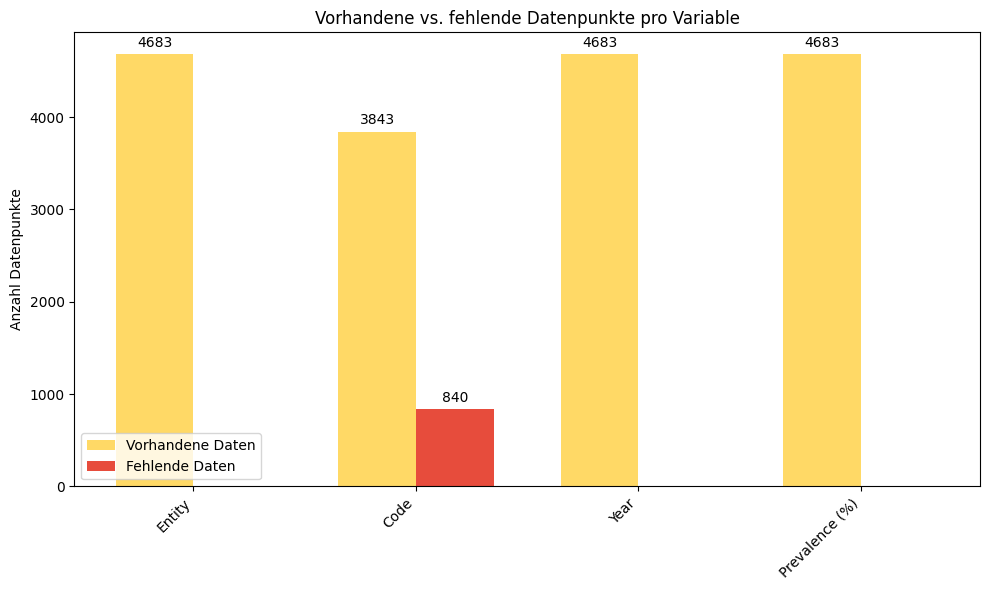

In [20]:
import matplotlib.pyplot as plt
import numpy as np

variables = df.columns
present = df.count().values
missing = df.isna().sum().values

x = np.arange(len(variables))
width = 0.35

plt.figure(figsize=(10, 6))

vorhanden_farbe = '#FFD966'   
fehlend_farbe = '#E74C3C'     

rects1 = plt.bar(
    x - width / 2,
    present,
    width,
    label='Vorhandene Daten',
    color=vorhanden_farbe
)

rects2 = plt.bar(
    x + width / 2,
    missing,
    width,
    label='Fehlende Daten',
    color=fehlend_farbe
)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            plt.annotate(
                f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom'
            )

autolabel(rects1)
autolabel(rects2)

plt.xticks(x, variables, rotation=45, ha='right')
plt.ylabel("Anzahl Datenpunkte")
plt.title("Vorhandene vs. fehlende Datenpunkte pro Variable")
plt.legend()
plt.tight_layout()
plt.show()

Das Diagramm visualisiert die Anzahl der vorhandenen (gelb) und fehlenden (rot) Datenpunkte für vier Variablen: Entity, Code, Year und Prevalence (%). Das Ergebnis zeigt, dass nur die Variable 'Code' eine Anzahl fehlender Datenpunkte aufweist, während die anderen Variablen nahezu vollständig sind.

Erklärung der Funktionen welche wir für das Diagramm benötigt haben: 

1. Importierung:

import matplotlib.pyplot as plt
- Importiert die Plot-Bibliothek zum Zeichnen der Grafik

import numpy as np
- Importiert NumPy, um später Positionen der Balken zu berechnen

<br>
<br>
2. Variablen definieren:

variables = df.columns
- Speichert alle Spaltennamen des DataFrames

present = df.count().values
-  Zählt für jede Spalte die vorhandenen (nicht-fehlenden) Werte

missing = df.isna().sum().values
- Zählt für jede Spalte die fehlenden Werte (NaN)

x = np.arange(len(variables))
- Erstellt Positionen 0,1,2,… für die Balken

width = 0.35
-  Legt die Breite der Balken fest

<br>
<br>
3. Plot vorbereiten:

plt.figure(figsize=(10,6))
- Erstellt eine Grafikfläche in der Größe 10×6

vorhanden_farbe = 'gold' / fehlend_farbe = 'red'
- Definiert die Farben der Balken

<br>
<br>
4. Balkendiagramm zeichnen:

rects1 = plt.bar(x - width/2, present, width, ...)
- Zeichnet links die Balken für vorhandene Daten

rects2 = plt.bar(x + width/2, missing, width, ...)
- Zeichnet rechts daneben die Balken für fehlende Daten

<br>
<br>
5. Balkenbeschriftung anwenden:

autolabel(rects1)
- Beschriftet „vorhandene Daten“

autolabel(rects2)
- Beschriftet „fehlende Daten“

<br>
<br>
6. Achsenbeschriftungen & Layout:

plt.xticks(x, variables, rotation=45)
- Beschriftet die X-Achse mit den Spaltennamen (gedreht um 45°)

plt.ylabel("Anzahl Datenpunkte")
- Y-Achse erhält eine Beschriftung

plt.title("Vorhandene vs. fehlende Datenpunkte pro Variable")
- Titel setzen

plt.legend()
- Legende anzeigen

plt.tight_layout()
- Sorgt dafür, dass nichts abgeschnitten wird

plt.show()
- Zeigt die fertige Grafik an

<a id="toc-5-3-wie-ist-die-verteilung-der-zu-untersuchenden-variabel"></a>
### 5.4 Wie ist die Verteilung der zu untersuchenden Variabel

<a id="toc-5-3-1-histogramm-verteilung-der-unterernaehrungsrate"></a>
#### 5.4.1 Histogramm (Verteilung der Unterernährungsrate)

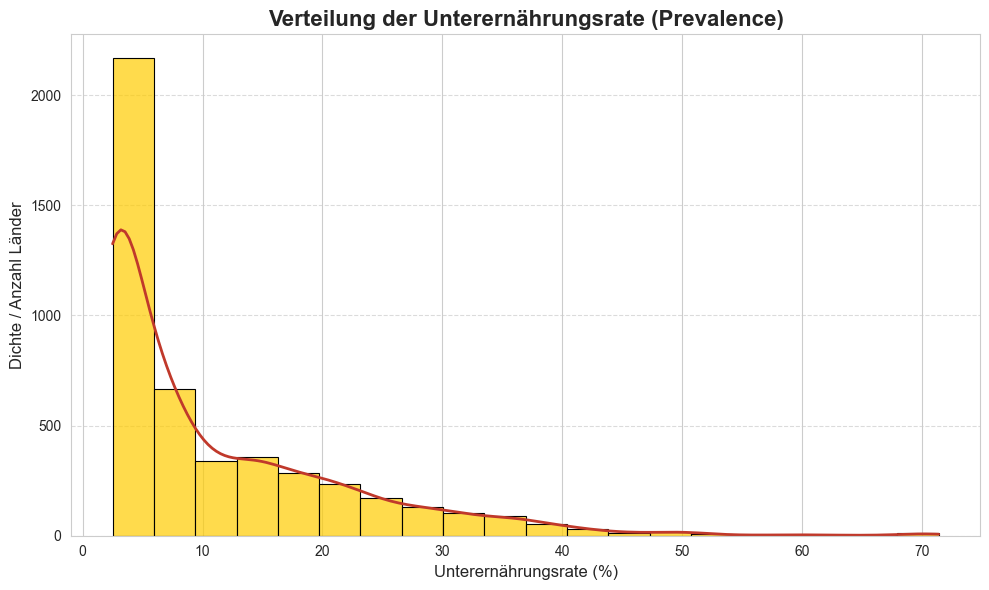

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.histplot(
    df['Prevalence (%)'].dropna(),
    bins=20,
    color="#FFCC00",      
    edgecolor='black',
    kde=True,             
    linewidth=0.8,
    alpha=0.7
)

ax.lines[0].set_color('#C0392B')   
ax.lines[0].set_linewidth(2)

plt.title(
    "Verteilung der Unterernährungsrate (Prevalence)",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Unterernährungsrate (%)", fontsize=12)
plt.ylabel("Dichte / Anzahl Länder", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Erklärung der Funktionen, welche für das Diagramm benötigt wurden: 

1. Importe

import matplotlib.pyplot as plt
- Bibliothek zum Erstellen von Diagrammen

import pandas as pd
- Wird benötigt, um mit DataFrames zu arbeiten

import seaborn as sns
- Bietet moderne, schönere Diagramme auf Basis von Matplotlib 

<br>
<br>
2. Grafikfläche und Stil einstellen

plt.figure(figsize=(10, 6))
- Legt die Größe der Grafik fest (10 × 6)

sns.set_style("whitegrid")
- Hintergrundstil: Weißer Hintergrund mit Gitternetzlinien

<br>
<br>
3. Histogramm erstellen

df['Prevalence (%)'].dropna()
- Verwendet die Spalte Unterernährungsrate (%) und entfernt fehlende Werte.

bins=20
- Das Histogramm wird in 20 Klassen (Intervalle) unterteilt.

color='gold'
- Die Balken bekommen eine goldene Farbe.

edgecolor='black'
- Die Balken haben schwarze Ränder.

kde=True
- Zusätzlich wird eine KDE-Kurve gezeichnet (eine geglättete Dichtekurve).

linewidth=0.8
- Breite der Balkenumrandung.

alpha=0.7
- Transparenz der Balken (0 = durchsichtig, 1 = undurchsichtig).

<br>
<br>
4. Titel und Achsenbeschriftungen

plt.title("Verteilung der Unterernährungsrate (Prevalence)", fontsize=16, fontweight='bold')
- Setzt einen Titel für das Diagramm.

plt.xlabel("Unterernährungsrate (%)", fontsize=12)
- Beschriftet die X-Achse.

plt.ylabel("Dichte / Anzahl Länder", fontsize=12)
- Beschriftet die Y-Achse.

<br>
<br>
5. Gitterlinien

plt.grid(axis='y', linestyle='--', alpha=0.7)
- Fügt horizontale gestrichelte Gitterlinien hinzu.

<br>
<br>
6. Layout & Anzeige

plt.tight_layout()
- Sorgt für optimale Abstände im Diagramm.

plt.show()
- Zeigt die endgültige Grafik an.

Das Ergebnis des Histogramms zeigt eine stark rechtsschiefe Verteilung, bei der die überwiegende Mehrheit der Länder eine sehr niedrige Prävalenz von Unterernährung aufweist, während nur wenige Länder hohe Raten melden. Die Grafik verwendet 20 Bins, um die Häufigkeit der Länder (Anzahl Länder) über verschiedene Prävalenzbereiche (%) darzustellen.

<a id="toc-5-3-2-boxplot-ausreisser-und-quartile"></a>
#### 5.4.2 Boxplot (Ausreisser und Quartile)

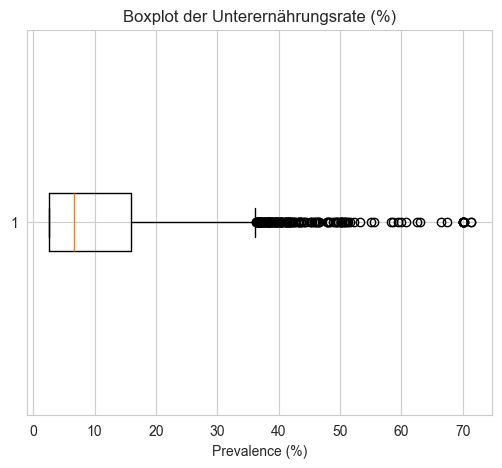

In [22]:
plt.figure(figsize=(6,5))
plt.boxplot(df['Prevalence (%)'].dropna(), vert=False)
plt.title("Boxplot der Unterernährungsrate (%)")
plt.xlabel("Prevalence (%)")
plt.show()

Um dieses Diagramm besser zu veranschaulichen: 

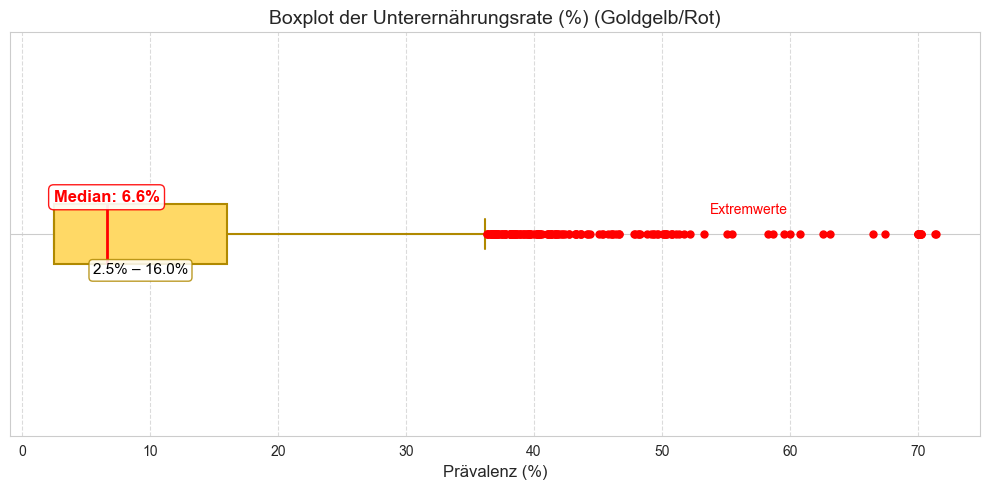

In [23]:
import matplotlib.pyplot as plt
import numpy as np

data_to_plot = df['Prevalence (%)'].dropna().values

Q1 = np.percentile(data_to_plot, 25)
Median = np.percentile(data_to_plot, 50)
Q3 = np.percentile(data_to_plot, 75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5 * IQR

goldgelb = "#FFD966"      
randfarbe = "#B08900"     
medianfarbe = "red"       

plt.figure(figsize=(10, 5))

bp = plt.boxplot(
    data_to_plot,
    vert=False,
    patch_artist=True,
    flierprops={
        'marker': 'o',
        'markeredgecolor': 'red',
        'markerfacecolor': 'red',
        'markersize': 5
    }
)

for box in bp['boxes']:
    box.set(facecolor=goldgelb, edgecolor=randfarbe, linewidth=1.5)

for median in bp['medians']:
    median.set(color=medianfarbe, linewidth=2)

for whisker in bp['whiskers']:
    whisker.set(color=randfarbe, linewidth=1.5)
for cap in bp['caps']:
    cap.set(color=randfarbe, linewidth=1.5)

plt.text(
    Median, 1.08,
    f'Median: {Median:.1f}%',
    ha='center',
    fontsize=12,
    fontweight='bold',
    color=medianfarbe,
    bbox=dict(
        boxstyle='round,pad=0.3',
        facecolor='white',
        edgecolor=medianfarbe,
        alpha=0.9
    )
)

x_mitte_box = (Q1 + Q3) / 2
plt.text(
    x_mitte_box, 0.9,
    f'{Q1:.1f}% – {Q3:.1f}%',
    ha='center',
    fontsize=11,
    color='black',
    bbox=dict(
        boxstyle='round,pad=0.25',
        facecolor='white',
        edgecolor=randfarbe,
        alpha=0.85
    )
)

outliers = data_to_plot[data_to_plot > Upper_Whisker]
if len(outliers) > 0:
    max_outlier_display = np.percentile(outliers, 90)
    plt.text(
        max_outlier_display, 1.05,
        f'Extremwerte',
        ha='right',
        color='red',
        fontsize=10
    )

plt.title("Boxplot der Unterernährungsrate (%) (Goldgelb/Rot)", fontsize=14)
plt.xlabel("Prävalenz (%)", fontsize=12)
plt.yticks([1], [""])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Das Ergebnis des Boxplots zeigt, dass die Mehrheit der Länder eine niedrige Unterernährungsrate hat (Median bei 6.6% , 50% der Daten zwischen ca. 2.5% und 16%), aber eine grosse Anzahl von Ausreissern mit sehr hohen Raten bis zu 70% existiert. Der Boxplot verdeutlicht somit die stark schiefe Verteilung der Daten und die Existenz extremer Werte in einigen Ländern.

1. Datenvorbereitung und Kennzahlen:

import matplotlib.pyplot as plt

- Importiert die Bibliothek Matplotlib für das Plotten und gibt ihr das Kürzel plt.

import numpy as np

- Importiert NumPy für numerische Berechnungen (z. B. Perzentile).

data_to_plot = df['Prevalence (%)'].dropna().values

- Extrahiert die Daten aus der Spalte "Prevalence (%)", entfernt fehlende Werte und speichert sie als NumPy-Array.

Q1 = np.percentile(data_to_plot, 25)

- Berechnet das 1. Quartil (25. Perzentil).

Median = np.percentile(data_to_plot, 50)

- Berechnet den Median.

Q3 = np.percentile(data_to_plot, 75)

- Berechnet das 3. Quartil (75. Perzentil).

IQR = Q3 - Q1

- Berechnet den Interquartilsabstand.

Upper_Whisker = Q3 + 1.5 * IQR

- Definiert die Obergrenze für potenzielle Ausreißer nach der üblichen 1.5×IQR-Regel.

<br>
<br>
2. Plot-Erstellung und Basisformatierung:

plt.figure(figsize=(10, 5))

- Erstellt eine neue Grafik in der Größe 10×5.

bp = plt.boxplot(...)

- Generiert den Boxplot. Die Variable bp enthält alle Elemente des Plots.

<br>
<br>
Parameter:

data_to_plot → Die zu visualisierenden Werte

vert=False → Boxplot wird horizontal ausgegeben

patch_artist=True → Ermöglicht farbige Boxen

flierprops={...} → Stil der Ausreißer (rote Kreise, Größe 5)

<br>
<br>
3. Detailformatierung der Plot-Elemente Boxen färben:

for box in bp['boxes']:
Iteriert über die Box-Elemente.

box.set(facecolor='yellow', edgecolor='black', linewidth=1.5)
→ Gelbe Box, schwarzer Rand, dicke Linien.

<br>
<br>
Median-Linie

for median in bp['medians']:
Färbt die Medianlinie:

median.set(color='red', linewidth=2)


4. Textbeschriftungen und Diagramm-Metadaten

plt.text(Median, 1.05, ...)
- Platziert den Medianwert als roten Text leicht oberhalb der Box.

x_mitte_box = (Q1 + Q3) / 2
- Berechnet die horizontale Mitte der Box.

plt.text(x_mitte_box, 0.9, ...)
- Beschriftet den Bereich von Q1 bis Q3.

<br>
<br>
Ausreisser analysieren

outliers = data_to_plot[data_to_plot > Upper_Whisker]
Identifiziert alle Werte oberhalb des oberen Whiskers.

if len(outliers) > 0:
- Prüft, ob Ausreißer existieren.

max_outlier_display = np.percentile(outliers, 90)
- Berechnet ein repräsentatives Ausreißer-Perzentil für die Textplatzierung.

plt.text(max_outlier_display, 1.05, 'Extremwerte', color='red')
- Beschriftet die extremen Werte.

<br>
<br>
5. Diagrammgestaltung

plt.title('Boxplot der Unterernährungsrate (Gelb/Rot)', fontsize=14)
- Setzt den Diagrammtitel.

plt.xlabel('Prävalenz (%)', fontsize=12)
- Beschriftet die x-Achse.

plt.yticks([1], [''])
- Entfernt die y-Achsenbeschriftung (nur eine Kategorie).

plt.grid(axis='x', linestyle='--', alpha=0.7)
- Fügt horizontale gestrichelte Hilfslinien hinzu.

plt.tight_layout()
- Optimiert die Layoutabstände.

plt.show()
- Gibt die finale Grafik aus.

<a id="toc-5-3-3-saeulendiagramm-fuer-anzahl-datenpunkte-pro-jahr"></a>
#### 5.4.3 Säulendiagramm für Anzahl Datenpunkte pro Jahr

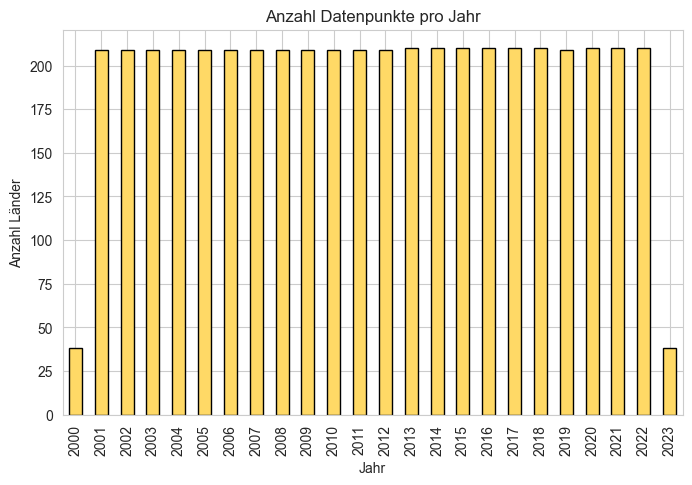

In [24]:
plt.figure(figsize=(8,5))
df['Year'].value_counts().sort_index().plot(
    kind='bar', 
    color='#FFD966', 
    edgecolor='black'  
)
plt.title("Anzahl Datenpunkte pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Länder")
plt.show()

Das Ergebnis in der Grafik zeigt eine nahezu vollständige Datenerfassung für alle Jahre von 2001 bis 2022 (jeweils über 200 Länder), während die Jahre 2000 und 2023 deutlich weniger Datenpunkte aufweisen. Das Diagramm visualisiert, dass der Datensatz in den Jahren 2001 bis 2022 am umfassendsten ist und die extrem niedrigen Balken am Anfang und Ende des Zeitraums die unvollständige Verfügbarkeit für diese spezifischen Jahre hervorheben.

<a id="toc-6-zusammenhaenge-zwischen-zwei-variabeln-streuungsdiagramm-korrelationsmatrix"></a>
## 6 Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

<a id="toc-6-1-streudiagramm-scatterplot"></a>
### 6.1 Streudiagramm (Scatterplot)

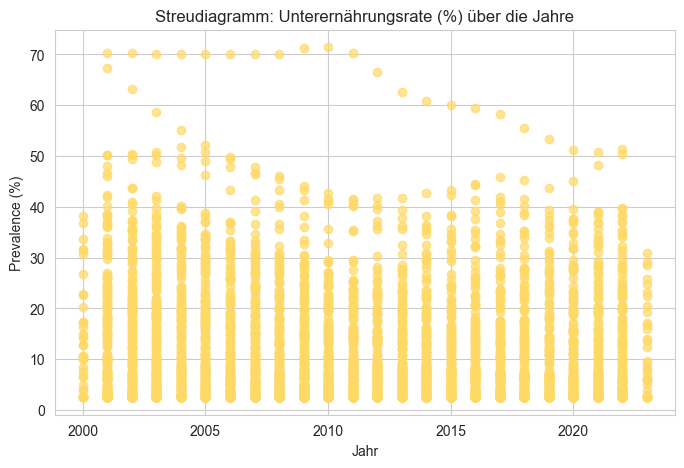

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(
    df['Year'], 
    df['Prevalence (%)'], 
    alpha=0.7,         
    color='#FFD966'    
)
plt.title("Streudiagramm: Unterernährungsrate (%) über die Jahre")
plt.xlabel("Jahr")
plt.ylabel("Prevalence (%)")
plt.show()

Das Streudiagramm ist schwierig zu interpretieren, da die vielen Datenpunkte (Länder und Jahre) übereinanderliegen (Overplotting), wodurch die tatsächliche Dichte oder die Entwicklung einzelner Regionen nicht erkennbar ist. Es zeigt zwar die breite Verteilung, liefert aber keinen klaren Wert für die globale Entwicklung des Problems, da die einzelnen Punkte nicht identifizierbar sind. Für die Analyse des Trends wäre ein Liniendiagramm des jährlichen Durchschnitts wesentlich informativer und übersichtlicher.

<a id="toc-6-2-korrelationsmatrix"></a>
### 6.2 Korrelationsmatrix

In [26]:
numeric_vars = df[['Year', 'Prevalence (%)']]

corr_matrix = numeric_vars.corr()
print("Korrelationsmatrix:")
print(corr_matrix)

Korrelationsmatrix:
                    Year  Prevalence (%)
Year            1.000000       -0.125489
Prevalence (%) -0.125489        1.000000


Die Korrelationsmatrix zeigt, dass es nur einen sehr schwachen Zusammenhang zwischen der Zeit (Jahr) und der Unterernährungsrate (Prävalenz) gibt. Die Rate ist über die Jahre hinweg leicht gesunken (negativer Wert), aber dieser Rückgang ist so gering, dass die Zeit allein kaum der Grund dafür ist; andere Faktoren haben einen viel grösseren Einfluss auf die Raten.

<a id="toc-7-untersuchung-der-fragestellung"></a>
## 7 Untersuchung der Fragestellung

<a id="toc-fragestellung-1-wie-hat-sich-der-weltweite-anteil-unterernaehrter-menschen-im-laufe-der-zeit-entwickelt"></a>
### Fragestellung 1: Wie hat sich der weltweite Anteil unterernährter Menschen im Laufe der Zeit entwickelt?

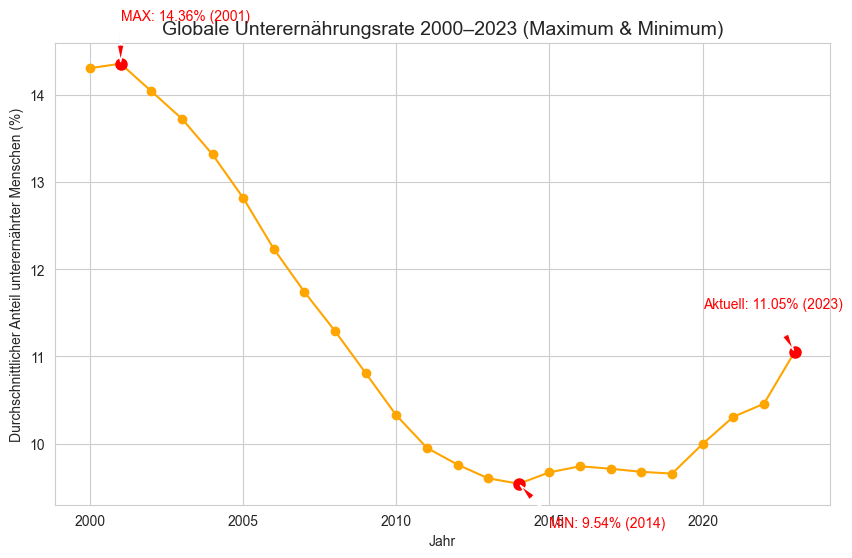

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_unterernaehrungsrate_dynamisch_markieren(df: pd.DataFrame):
    
    global_trend = df.groupby('Year')['Prevalence (%)'].mean().reset_index()
    prevalence = global_trend['Prevalence (%)']
    years = global_trend['Year']
    
    idx_max = prevalence.idxmax()
    year_max = years[idx_max]
    value_max = prevalence[idx_max]
    
    idx_min = prevalence.idxmin()
    year_min = years[idx_min]
    value_min = prevalence[idx_min]
    
    try:
        value_end = global_trend[global_trend['Year'] == 2023]['Prevalence (%)'].values[0]
        year_end = 2023
    except:
        value_end = 11.05
        year_end = 2023

    plt.figure(figsize=(10, 6))
    
    plt.plot(years, prevalence, 
             marker='o', color='orange', label='Durchschnittlicher Anteil unterernährter Menschen')
    
    plt.title("Globale Unterernährungsrate 2000–2023 (Maximum & Minimum)", fontsize=14)
    plt.xlabel("Jahr")
    plt.ylabel("Durchschnittlicher Anteil unterernährter Menschen (%)")
    plt.grid(True)

    plt.plot(year_max, value_max, 'ro', markersize=8)
    plt.annotate(f"MAX: {value_max:.2f}% ({year_max})", 
                 xy=(year_max, value_max), 
                 xytext=(year_max, value_max + 0.5), 
                 arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5),
                 color='red', fontsize=10)

    plt.plot(year_min, value_min, 'ro', markersize=8)
    plt.annotate(f"MIN: {value_min:.2f}% ({year_min})", 
                 xy=(year_min, value_min), 
                 xytext=(year_min + 1, value_min - 0.5), 
                 arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5),
                 color='red', fontsize=10)

    plt.plot(year_end, value_end, 'ro', markersize=8)
    plt.annotate(f"Aktuell: {value_end:.2f}% ({year_end})", 
                 xy=(year_end, value_end), 
                 xytext=(year_end - 3, value_end + 0.5),
                 arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5),
                 color='red', fontsize=10)
    
    plt.show()

plot_unterernaehrungsrate_dynamisch_markieren(df)

#### Analyse und Interpretation zur Fragestellung 1

**Zentrale Aussagen und Zusammenhänge:**

Die bereitgestellte Auflistung und der Code zeigen eine signifikante Veränderung des durchschnittlichen Anteils unterernährter Menschen weltweit zwischen 2000 und 2023.

- Rückgang: Der Anteil begann im Jahr 2000 bei 14,31 % und sank kontinuierlich bis zu einem Tiefpunkt von etwa 9,54 % im Jahr 2014, was auf positive globale Entwicklungen in diesem Zeitraum hindeutet.

- Anstieg: Ab 2015 stagnierte die Rate und begann leicht anzusteigen, besonders bemerkbar zwischen 2019 und 2023, wo sie von 9,66 % auf 11,05 % anstieg.

- Gesamtveränderung: Über den gesamten Zeitraum von 2000 bis 2023 gab es eine absolute Reduzierung um -3,26 Prozentpunkte oder eine relative Veränderung von -22,76 %. Die Darstellung zeigt, dass die Bemühungen zur Reduzierung der Unterernährung über weite Strecken erfolgreich waren, jedoch in den letzten Jahren durch neue Herausforderungen wieder Rückschläge erfahren haben.

**Erklärung zur Abnahme des weltweiten Unterernährungsanteils:**

Der Grund für den Rückgang der Zahl der unterernährten Menschen, ist der Fortschritt in der Landwirtschaft, verbreiteter Handel, eine verstärkte wirtschaftliche und politische Stabilität. Auch wurden Fortschritte gesehen durch den Bereich des ausschliesslichen Stillens.

**Erklärung der Zunahme ab 2019 des Anteils unterernährter Menschen:**

Die Zahl der unterernährten Menschen stieg besonders aufgrund der COVID-Pandemie und der dadurch blockierten Handelswege. Die Hauptgründe für den Anstieg der Hungerleidenden sind vor allem kriegerische Konflikte, Klimawandel und Wirtschaftskrisen. Hinzu kommt, dass seit mehreren Jahren nicht genug Geld für die humanitäre Notversorgung mit Lebensmitteln vorhanden ist. Dies erschwert die Versorgung mit Nahrungsmitteln und somit das Hungerproblem in Konfliktgebieten zusätzlich. Letztlich kommt dazu, dass mancherorts das demografische Wachstum zu gross ist.

**Heutige Lage:**

In vergangenen 10 Jahren hat sich die weltweite Hungersituation kaum gebessert. Die Anzahl der Menschen betroffen von Unterernährung hat sich 2024 verdoppelt. Die Ursachen liegen an der Mischung aus Kriegen, Klimaschocks und wirtschaftlichen Unsicherheiten. Dazu kommt, dass die internationale Unterstützung gesunken ist und unzählige Frühwarnsysteme nicht mehr finanziert werden.

Die massivsten Treiber sind Kriege. 20 Ernährungskrisen wurden im vergangenen Jahr ausgelöst, von denen rund 140 Millionen Menschen betroffen waren. Gewaltsame Konflikte blockieren Handelsrouten, zerstören Felder und schliessen die humanitäre Hilfe aus. In manchen Ländern wird Hunger bewusst als Waffe eingesetzt, was verheerende Folgen für die Bevölkerung hat.

**Datenquellen:**

- https://de.wfp.org/pressemitteilungen/un-bericht-die-zahl-der-weltweit-von-hunger-betroffenen-menschen-ist-im-jahr
- https://www.srf.ch/news/international/uno-welternaehrungsbericht-beim-kampf-gegen-hunger-ist-die-welt-nicht-auf-kurs
- https://www.srf.ch/news/wirtschaft/welthunger-index-2025-eine-welt-ohne-hunger-rueckt-in-weite-ferne
- https://www.deutschlandfunk.de/welthunger-index-un-massnahmen-krieg-klimakrise-corona-100.html


<a id="toc-fragestellung-2-welche-6-laender-sind-im-jahr-2022-am-staerksten-von-unterernaehrung-betroffen"></a>
### Fragestellung 2: Welche 6 Länder sind im Jahr 2022 am stärksten von Unterernährung betroffen?

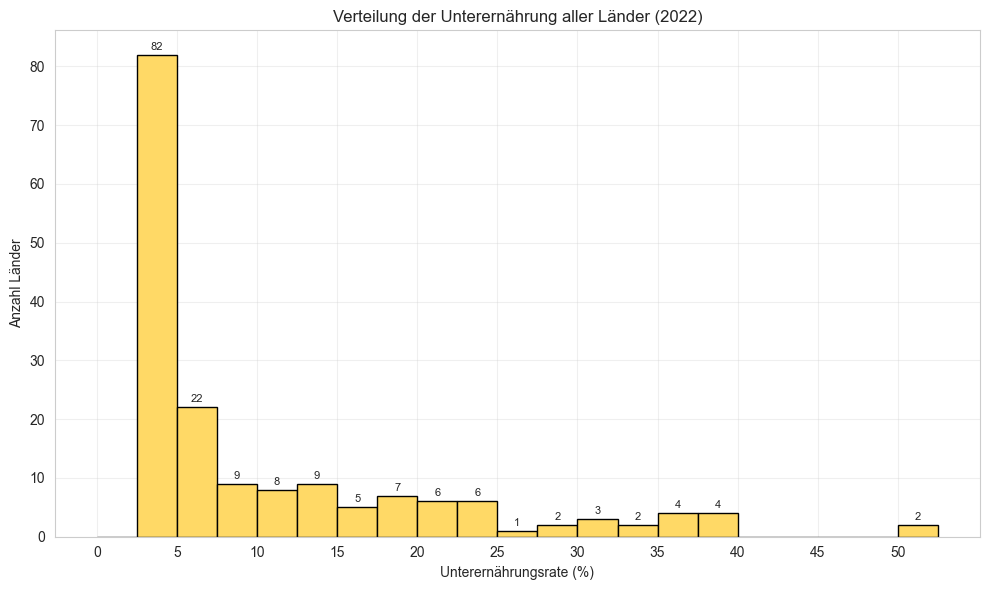

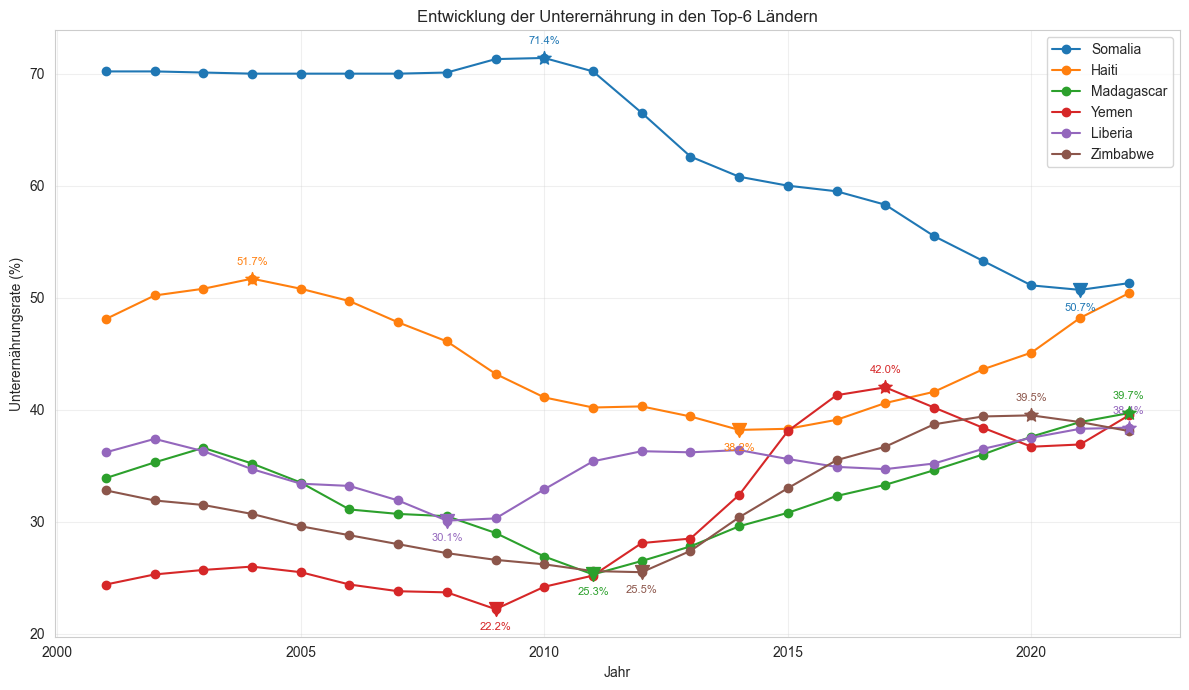

In [28]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

try:
    with zipfile.ZipFile(zip_path) as z:
        with z.open(file_name) as f:
            df = pd.read_csv(f)
except FileNotFoundError:
    print(f"Fehler: Die Datei {zip_path} oder {file_name} wurde nicht gefunden. Bitte stellen Sie sicher, dass die Datei im richtigen Pfad liegt.")
    exit()

old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

latest_year = df_countries["Year"].max()
df_latest = df_countries[df_countries["Year"] == latest_year]

top6 = df_latest.sort_values("Prevalence (%)", ascending=False).head(6)

fig, ax = plt.subplots(figsize=(10,6))
n, bins, patches = ax.hist(
    df_latest["Prevalence (%)"],
    bins=np.arange(0, 55, 2.5),
    color='#FFD966', edgecolor='black'
)
ax.set_title(f"Verteilung der Unterernährung aller Länder ({latest_year})")
ax.set_xlabel("Unterernährungsrate (%)")
ax.set_ylabel("Anzahl Länder")
ax.grid(True, alpha=0.3)
ax.set_xticks(np.arange(0, 55, 5))

for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        ax.text(
            patches[i].get_x() + patches[i].get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()

df_top6_over_time = df[df["Entity"].isin(top6["Entity"])]

fig, ax = plt.subplots(figsize=(12,7))

colors = plt.colormaps['tab10']  

for i, country in enumerate(top6["Entity"]):
    country_data = df_top6_over_time[df_top6_over_time["Entity"] == country].sort_values("Year")
    line_color = colors(i)

    ax.plot(
        country_data["Year"], country_data["Prevalence (%)"],
        marker='o', label=country, color=line_color
    )

    max_val = country_data["Prevalence (%)"].max()
    max_row = country_data[country_data["Prevalence (%)"] == max_val].iloc[0]
    ax.scatter(max_row["Year"], max_row["Prevalence (%)"], color=line_color, s=100, zorder=5, marker='*')
    ax.annotate(
        f'{max_val:.1f}%',
        (max_row["Year"], max_row["Prevalence (%)"]),
        textcoords="offset points", xytext=(0,10),
        ha='center', fontsize=8, color=line_color
    )

    min_val = country_data["Prevalence (%)"].min()
    min_row = country_data[country_data["Prevalence (%)"] == min_val].iloc[0]
    ax.scatter(min_row["Year"], min_row["Prevalence (%)"], color=line_color, s=100, zorder=5, marker='v')
    ax.annotate(
        f'{min_val:.1f}%',
        (min_row["Year"], min_row["Prevalence (%)"]),
        textcoords="offset points", xytext=(0,-15),
        ha='center', fontsize=8, color=line_color
    )

ax.set_title("Entwicklung der Unterernährung in den Top-6 Ländern")
ax.set_xlabel("Jahr")
ax.set_ylabel("Unterernährungsrate (%)")
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

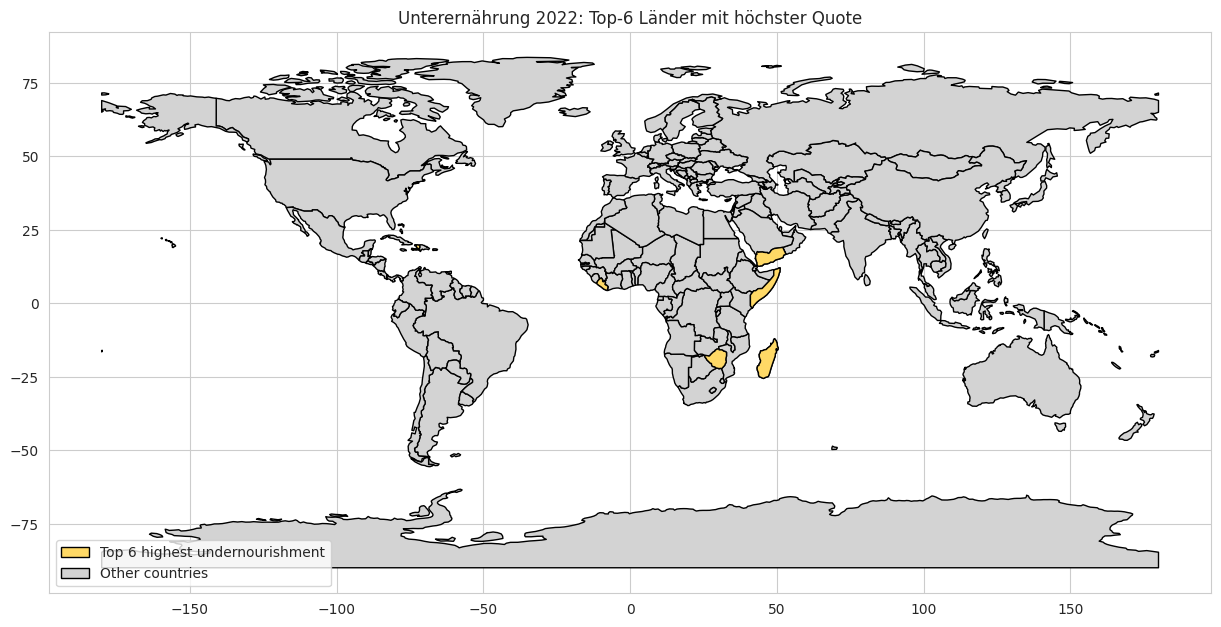

In [29]:
import geopandas as gpd
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

plt.rcParams["font.family"] = "DejaVu Sans"

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"
with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

latest_year = df_countries["Year"].max()
df_latest = df_countries[df_countries["Year"] == latest_year]

top6_highest = df_latest.nlargest(6, "Prevalence (%)")["Entity"].tolist()

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world.rename(columns={"ADMIN": "name"})

world['top6_highest'] = world['name'].apply(lambda x: x in top6_highest)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.plot(ax=ax, color='lightgray', edgecolor='black')
world[world['top6_highest']].plot(ax=ax, color='#FFD966', edgecolor='black')

legend_elements = [
    Patch(facecolor='#FFD966', edgecolor='black', label='Top 6 highest undernourishment'),
    Patch(facecolor='lightgray', edgecolor='black', label='Other countries')
]
ax.legend(handles=legend_elements, loc='lower left')

plt.title("Unterernährung 2022: Top-6 Länder mit höchster Quote")  

plt.show()

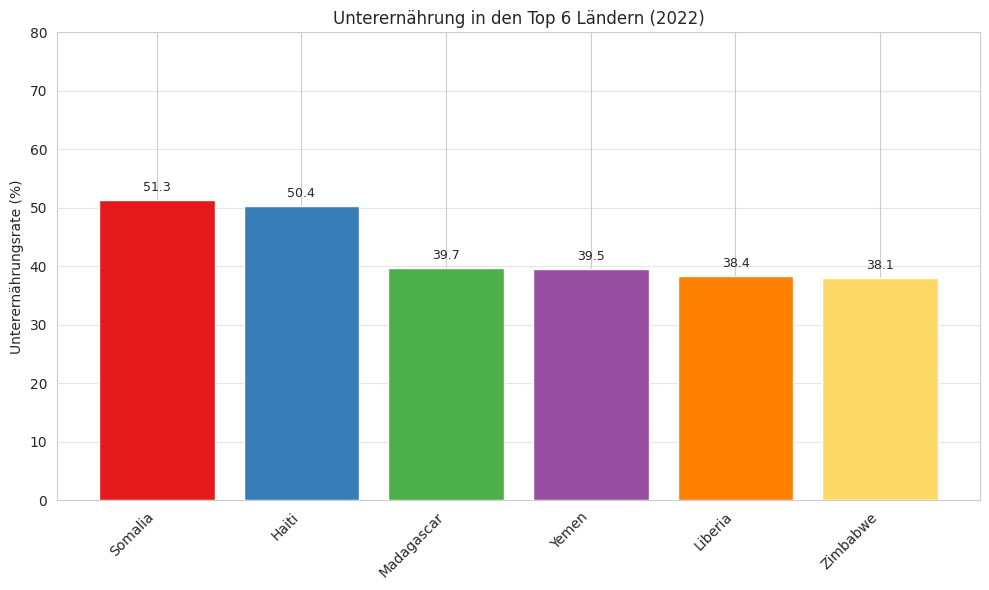

In [30]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

try:
    with zipfile.ZipFile(zip_path) as z:
        with z.open(file_name) as f:
            df = pd.read_csv(f)
except FileNotFoundError:
    print("Fehler: Datenquelle nicht gefunden.")
    exit()

old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

latest_year = df_countries["Year"].max()
df_latest = df_countries[df_countries["Year"] == latest_year]

top6_highest_df = df_latest.nlargest(6, "Prevalence (%)").reset_index(drop=True)

countries = top6_highest_df['Entity']
rates = top6_highest_df['Prevalence (%)']
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#FFD966'] 

plt.figure(figsize=(10, 6))
bars = plt.bar(countries, rates, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom', fontsize=9)

plt.ylabel("Unterernährungsrate (%)")
plt.title(f"Unterernährung in den Top 6 Ländern ({latest_year})")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 80) 
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#### Analyse und Interpretation zur Fragestellung 2

Zur Beantwortung dieser Fragestellung wurde der Datensatz zunächst auf Länder mit gültigem Ländercode und vollständigen Unterernährungswerten begrenzt. Anschliessend wurde das letzte Jahr bestimmt, für das Messwerte realer Staaten vorliegen; im vorliegenden Datensatz ist dies 2022. Für dieses Jahr wurden die Unterernährungsraten extrahiert und absteigend sortiert, wodurch die sechs Länder mit den höchsten Werten identifiziert wurden: Somalia, Haiti, Madagascar, Yemen, Liberia und Zimbabwe.

Die Ergebnisse wurden durch mehrere Visualisierungen ergänzt. Ein Histogramm zeigt die Verteilung aller Unterernährungsraten im Jahr 2022 und ordnet die genannten Länder klar im oberen Extrembereich ein. Ein Liniendiagramm stellt ihre zeitliche Entwicklung dar. Zusätzlich wurde eine Weltkarte erstellt, auf der die sechs Länder farblich hervorgehoben sind, sowie ein Bild mit ihren Flaggen eingebunden.

**Hintergrundanalyse: Gründe für die starke Betroffenhei der sechs Länder**

**Somalia:** 

In Somalia im Osten Afrikas kam es zuletzt zur schlimmsten Dürre seit 40 Jahren. Mehrere Regenzeiten hintereinander blieben aus, sodass viele Familien ihre Grundversorgung nicht mehr sicherstellen konnten und sich gezwungen sahen, wegen der Dürre auf der Suche nach Nahrung zu fliehen. Durch diese extreme Trockenheit starben über 40.000 Menschen, darunter etwa die Hälfte Kinder.

Auf die langen Trockenphasen folgten Überschwemmungen, die die Lage weiter verschärften. Im Jahr 2023 war die Hungersituation in einigen Regionen so kritisch, dass sie kurz vor einer offiziellen Hungersnot standen. Insgesamt sind fast sieben Millionen Menschen in Somalia auf sofortige humanitäre Unterstützung angewiesen (Stand: Dezember 2024). Neben der Nahrungsmittelknappheit ist auch der Zugang zu Trinkwasser stark beeinträchtigt. Viele Flüsse und Seen in Ostafrika sind ausgetrocknet, wodurch die Preise für Wasser massiv gestiegen sind. Auch die Versorgung des Viehbestands ist dadurch bedroht, was wiederum die Einkommen der Familien gefährdet. Da sich zahlreiche Haushalte kein sauberes Wasser mehr leisten können, mussten Hunderttausende Menschen innerhalb des Landes fliehen.

**Liberia:**

Die Folgen von 14 Jahren Bürgerkrieg prägen das Land bis heute. Armut, Krankheiten und Hunger bestimmen vielerorts den Alltag. Der Konflikt hat die Gesellschaft stark gespalten. Über 44 Prozent der Bevölkerung leben unter der internationalen Armutsgrenze und müssen mit weniger als 1,90 US-Dollar am Tag auskommen.

Der Bürgerkrieg, der 2003 endete, kostete mehr als 270.000 Menschenleben, zwang eine halbe Million Menschen zur Flucht und zerstörte grosse Teile der wirtschaftlichen und infrastrukturellen Grundlagen des Landes. Auch das Gesundheitssystem und Bildungssystem brach aufgrund des Krieges zusammen. Als Ellen Johnson Sirleaf im Jahr 2006 zur ersten weiblichen Präsidentin eines afrikanischen Staates gewählt wurde, verbanden viele Menschen damit die Hoffnung auf einen Neuanfang. Doch 2014 traf ein massiver Ebola-Ausbruch das Land hart und über 10.000 Menschen infizierten sich, fast 5.000 starben.

Heute versucht Liberia, sich neu zu stabilisieren. Dennoch gelingt es der Regierung unter Präsident George Weah bislang nicht, die grundlegende Versorgung der Bevölkerung in allen humanitären Bereichen sicherzustellen.

Zu den zentralen Herausforderungen gehört weiterhin ein stark geschwächtes Gesundheitssystem, dessen Mängel während der Ebola-Epidemie besonders sichtbar wurden. Es mangelt an ausgebildetem Fachpersonal, medizinischer Ausrüstung und Medikamenten. Krankheiten wie Malaria sind die häufigste Todesursache, gefolgt von Durchfall- und Atemwegserkrankungen. Weniger als 10 Prozent der Bevölkerung haben Zugang zu sauberem Trinkwasser. Zusätzlich belasten wirtschaftliche Ungleichheit, die Auswirkungen der Corona-Pandemie und weit verbreitete Korruption das Land. Besonders alarmierend ist die Rate der chronischen Mangelernährung bei Kindern unter fünf Jahren, die bei 29,8 Prozent liegt.

**Haiti:**

Auch Haiti gehört zu den Ländern mit den höchsten Unterernährungsraten weltweit. Ausschlaggebend dafür ist vor allem die Kombination aus chronischer Armut, politischer Instabilität und massiver Bandengewalt. Bewaffnete Gruppen kontrollieren grosse Teile der Hauptstadt und behindern den Transport von Lebensmitteln und humanitären Gütern, wodurch die Preise steigen und viele Regionen kaum noch versorgt werden. Dies hat zu einer schweren Hunger- und Vertreibungskrise geführt, von der Millionen Menschen betroffen sind.

Hinzu kommt eine hohe Abhängigkeit von Lebensmittelimporten. Je nach Jahreszeit stammen 50 bis 85 Prozent der Nahrungsmittel aus dem Ausland. Wiederkehrende Naturkatastrophen wie Wirbelstürme und klimatische Extreme zerstören regelmässig landwirtschaftliche Flächen und verschärfen die ohnehin geringe landwirtschaftliche Produktivität.

Die Ernährung vieler Haushalte ist wenig vielfältig und nährstoffarm, was besonders Kinder betrifft. Wachstumsverzögerungen, Mangelernährung sowie ein eingeschränkter Zugang zu sauberem Wasser, Gesundheitsversorgung und sanitären Einrichtungen verstärken die Problematik zusätzlich. Insgesamt führt das Zusammenspiel aus Gewalt, Instabilität, Importabhängigkeit, Naturkatastrophen und schwacher Infrastruktur zu einer äusserst hohen Unterernährungsrate in Haiti.

**Zimbabwe:**

Wiederkehrende Dürren und Überschwemmungen beeinträchtigten Zimbabwe stark. Die Temperaturen steigen in der Region mehr als doppelt so schnell wie im weltweiten Durchschnitt und unregelmässige Regenzeiten erschweren den Kleinbauern die Arbeit. Da im Land nicht genug Nahrungsmittel produziert werden, reicht finanzielle Unterstützung allein nicht aus, um den Bedarf zu decken. Zusätzlich verschärfen schnell steigende Preise für Grundnahrungsmittel die ohnehin kritische Ernährungssituation. In Zimbabwe ist die chronische Mangelernährung bei Kindern unter fünf Jahren sehr verbreitet und betrifft inzwischen ein Drittel dieser Altersgruppe. Besonders ländliche Regionen sind stark gefährdet, da viele Haushalte keinen verlässlichen Zugang zu sauberem Trinkwasser oder einer angemessenen sanitären Grundversorgung haben. Unter diesen Bedingungen breiten sich Krankheiten deutlich leichter aus, was die ohnehin schwierige Ernährungssituation zusätzlich verschärft.

**Madagaskar:**

Die Ursachen der Unterernährung in Madagaskar sind zahlreich. Zu den wichtigsten Ursachen zählen sozioökonomische Bedingungen wie weit verbreitete Armut, fehlende soziale Absicherung und grosse Einkommensunterschiede. Viele Familien können sich aufgrund ihrer schwierigen finanziellen Lage keine nährstoffreiche Ernährung leisten, und ohne soziale Sicherungssysteme sind Haushalte gefährdet von wirtschaftliche Krisen oder gesundheitliche Belastungen. Infektionskrankheiten, eingeschränkter Zugang zu medizinischer Versorgung und ungenügende Hygiene können die Ernährungssituation zusätzlich beeinträchtigen. Vor allem Durchfallerkrankungen, die in Madagaskar zu den häufigsten Ursachen für Kindersterblichkeit gehören, können bei Kindern schnell zu akuter Unterernährung führen. Zusätzlich tragen regionale Unterschiede zur Problematik bei, denn einige Gebiete des Landes sind stärker betroffen als andere. Besonders sind Regionen mit schwierigen klimatischen Bedingungen, eingeschränktem Zugang zu Gesundheitsdiensten oder einer schwachen landwirtschaftlichen Basis betroffen.

**Yemen:**

Die anhaltenden Kämpfe, der wirtschaftliche Zusammenbruch und wiederkehrende Krankheitsausbrüche haben dazu geführt, dass mehr als 17 Millionen Menschen von Ernährungsunsicherheit betroffen sind. Rund 4,8 Millionen Menschen mussten innerhalb des Landes fliehen und leben häufig in provisorischen Lagern. Obwohl ein kurzer Waffenstillstand im Jahr 2022 die Lage zeitweise etwas entspannte und den Zugang für humanitäre Hilfe erleichterte, bleibt die Gesamtsituation weiterhin äusserst kritisch.

**Datenquellen:**

- Somalia: https://www.unicef.de/informieren/projekte/afrika-2244/somalia-19334/hunger-in-somalia/13076
- Liberia: https://www.aktiongegendenhunger.de/afrika/liberia
- Haiti: https://www.globalhungerindex.org/de/case-studies/2019-haiti.html
- Haiti: https://www.aktiongegendenhunger.de/presse/haiti-kritische-ern
- Zimbabwe: https://www.dw.com/de/un-millionen-menschen-hungern-in-simbabwe/a-51518583#:~:text=Die%20Menschen%20in%20Simbabwe%20leiden%20laut%20UN-Weltern%C3%A4hrungsprogramm%20%28WFP%29,n%C3%A4chste%20Mahlzeit%20herkommen%20solle%2C%20sagte%20WFP-Exekutivdirektor%20David%20Beasley.
- Zimbabwe: https://www.aktiongegendenhunger.de/afrika/simbabwe
- Madagaskar: https://madagasikara.fr/de/warum-ist-die-bevolkerung-madagaskars-weiterhin-von-unterernahrung-bedroht/
- Yemen: https://de.wfp.org/krisen/jemen

<a id="toc-fragestellung-3-welche-6-laender-sind-im-jahr-2022-am-niedrigsten-von-unterernaehrung-betroffen"></a>
### Fragestellung 3: Welche 6 Länder sind im Jahr 2022 am niedrigsten von Unterernährung betroffen?

Letztes Jahr mit echten Länderwerten: 2022

Top-6 Länder mit der niedrigsten Unterernährung im Jahr 2022:
        Entity  Prevalence (%)
89     Algeria             2.5
247    Austria             2.5
225  Australia             2.5
179    Armenia             2.5
335    Belarus             2.5
357    Belgium             2.5


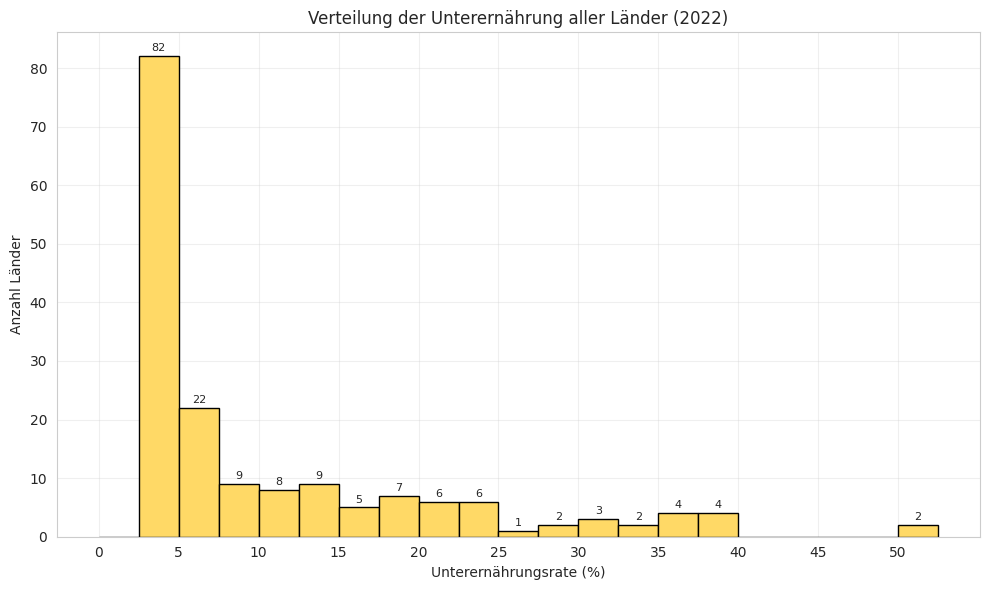

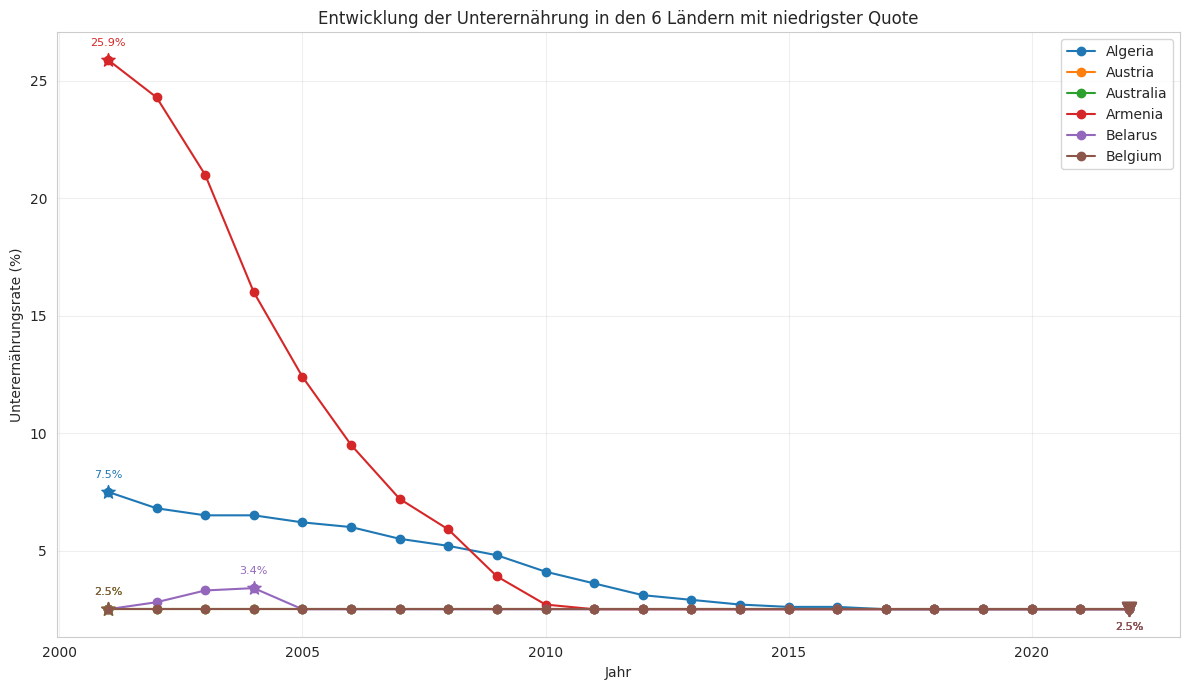

In [31]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

try:
    with zipfile.ZipFile(zip_path) as z:
        with z.open(file_name) as f:
            df = pd.read_csv(f)
except FileNotFoundError:
    print(f"Fehler: Die Datei {zip_path} oder {file_name} wurde nicht gefunden. Bitte stellen Sie sicher, dass die Datei im richtigen Pfad liegt.")
    exit()

old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

latest_year = df_countries["Year"].max()
df_latest = df_countries[df_countries["Year"] == latest_year]

print(f"Letztes Jahr mit echten Länderwerten: {latest_year}")

bottom6 = df_latest.sort_values("Prevalence (%)", ascending=True).head(6)
print(f"\nTop-6 Länder mit der niedrigsten Unterernährung im Jahr {latest_year}:")
print(bottom6[["Entity", "Prevalence (%)"]])

fig, ax = plt.subplots(figsize=(10,6))

n, bins, patches = ax.hist(df_latest["Prevalence (%)"], bins=np.arange(0, 55, 2.5), color='#FFD966', edgecolor='black')
ax.set_title(f"Verteilung der Unterernährung aller Länder ({latest_year})")
ax.set_xlabel("Unterernährungsrate (%)")
ax.set_ylabel("Anzahl Länder")
ax.grid(True, alpha=0.3)
ax.set_xticks(np.arange(0, 55, 5)) 

for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        ax.text(patches[i].get_x() + patches[i].get_width() / 2, height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

df_bottom6_over_time = df[df["Entity"].isin(bottom6["Entity"])]

fig, ax = plt.subplots(figsize=(12,7))
colors = plt.colormaps['tab10'] 

for i, country in enumerate(bottom6["Entity"]):
    country_data = df_bottom6_over_time[df_bottom6_over_time["Entity"] == country].sort_values("Year")
    line_color = colors(i)

    ax.plot(country_data["Year"], country_data["Prevalence (%)"], marker='o', label=country, color=line_color)

    max_val = country_data["Prevalence (%)"].max()
    min_val = country_data["Prevalence (%)"].min()

    max_row = country_data[country_data["Prevalence (%)"] == max_val].iloc[0]
    ax.scatter(max_row["Year"], max_row["Prevalence (%)"], color=line_color, s=100, zorder=5, marker='*')
    ax.annotate(f'{max_val:.1f}%',
                (max_row["Year"], max_row["Prevalence (%)"]),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color=line_color)

    min_row = country_data[country_data["Prevalence (%)"] == min_val].iloc[-1] 
    ax.scatter(min_row["Year"], min_row["Prevalence (%)"], color=line_color, s=100, zorder=5, marker='v')
    ax.annotate(f'{min_val:.1f}%',
                (min_row["Year"], min_row["Prevalence (%)"]),
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8, color=line_color)


ax.set_title("Entwicklung der Unterernährung in den 6 Ländern mit niedrigster Quote")
ax.set_xlabel("Jahr")
ax.set_ylabel("Unterernährungsrate (%)")
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


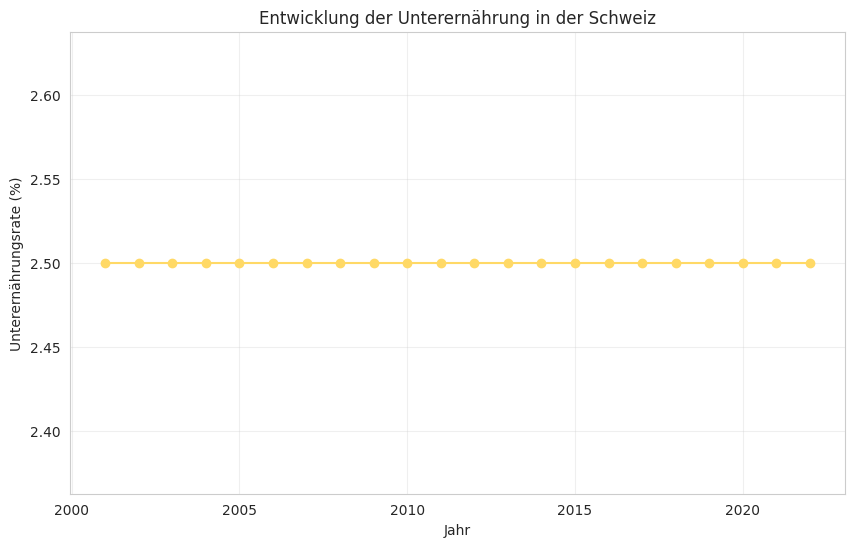

      Year  Prevalence (%)
4035  2001             2.5
4036  2002             2.5
4037  2003             2.5
4038  2004             2.5
4039  2005             2.5
4040  2006             2.5
4041  2007             2.5
4042  2008             2.5
4043  2009             2.5
4044  2010             2.5
4045  2011             2.5
4046  2012             2.5
4047  2013             2.5
4048  2014             2.5
4049  2015             2.5
4050  2016             2.5
4051  2017             2.5
4052  2018             2.5
4053  2019             2.5
4054  2020             2.5
4055  2021             2.5
4056  2022             2.5


In [32]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

df_switzerland = df_countries[df_countries["Entity"] == "Switzerland"]

plt.figure(figsize=(10,6))
plt.plot(df_switzerland["Year"], df_switzerland["Prevalence (%)"], marker='o', color='#FFD966')
plt.title("Entwicklung der Unterernährung in der Schweiz")
plt.xlabel("Jahr")
plt.ylabel("Unterernährungsrate (%)")
plt.grid(True, alpha=0.3)
plt.show()

print(df_switzerland[["Year", "Prevalence (%)"]])

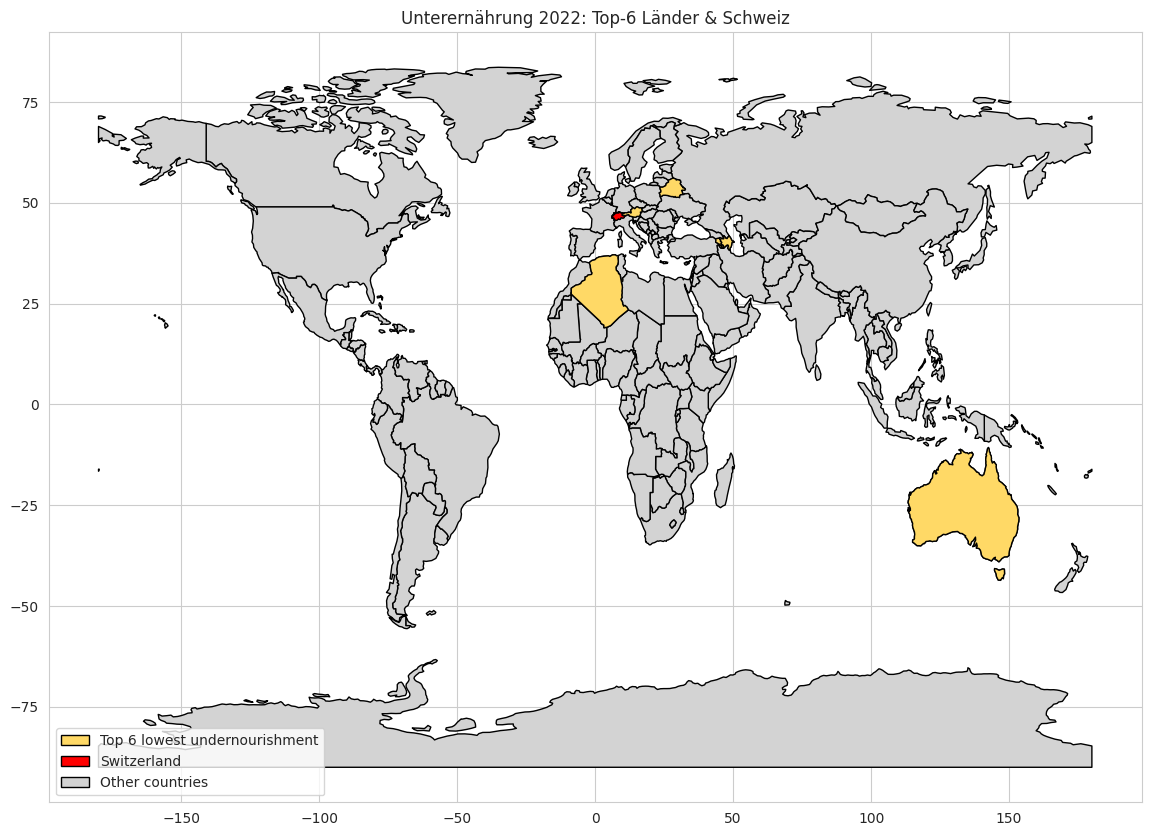

In [33]:
import geopandas as gpd
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"
with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

latest_year = df_countries["Year"].max()
df_latest = df_countries[df_countries["Year"] == latest_year]

top6 = df_latest.nsmallest(6, 'Prevalence (%)')['Entity'].tolist()
switzerland = ["Switzerland"]

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world.rename(columns={"ADMIN": "name"})

world['top6'] = world['name'].apply(lambda x: x in top6)
world['switzerland'] = world['name'].apply(lambda x: x in switzerland)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
world[world['top6']].plot(ax=ax, color='#FFD966', edgecolor='black')
world[world['switzerland']].plot(ax=ax, color='red', edgecolor='black')

legend_elements = [
    Patch(facecolor='#FFD966', edgecolor='black', label='Top 6 lowest undernourishment'),
    Patch(facecolor='red', edgecolor='black', label='Switzerland'),
    Patch(facecolor='lightgray', edgecolor='black', label='Other countries')
]
ax.legend(handles=legend_elements, loc='lower left')

plt.title("Unterernährung 2022: Top‑6 Länder & Schweiz")  
plt.show()

#### Analyse und Interpretation zur Fragestellung 3

Es gibt viele Länder, die im Jahr 2022 den gleichen, sehr niedrigen Unterernährungswert von 2,5 % haben. Weil es so viele sind, wurden in der Grafik nur sechs Länder gezeigt, und zwar einfach in alphabetischer Reihenfolge. Die ausgewählten Länder stehen also nur stellvertretend für eine grössere Gruppe mit sehr niedriger Unterernährung. Auch die Schweiz gehört zu diesen Ländern und liegt ebenfalls bei 2,5 %.

Die vorherigen Analysen zeigen, dass niedrige Unterernährungsraten eng mit hohen Einkommen, geringer Armut, funktionierenden Lebensmittelsystemen sowie stabilen sozialen, gesundheitlichen und politischen Strukturen zusammenhängen. Dies erklärt die guten Werte der Länder mit einer Unterernährungsrate von 2,5 %.

<a id="toc-fragestellung-4-gibt-es-einen-zusammenhang-zwischen-unterernaehrung-und-wirtschaftlichen-faktoren"></a>
### Fragestellung 4: Gibt es einen Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren?

#### Analyse und Interpretation zur Fragestellung 4

**Hintergrundanalyse zum Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren**

Es besteht ein eindeutiger Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren. Unterernährung wirkt wie ein Teufelskreis. Sie reduziert die Produktivität der Betroffenen und macht die jeweiligen Länder anfälliger für Armut. Unterernährung und Armut verstärken sich gegenseitig und zugleich verringern sie das wirtschaftliche Potenzial der Bevölkerung. Insbesondere Länder, die von Konflikten, schlechter Regierungsführung und Naturkatastrophen betroffen sind, sind von einer hohen Armutslast und somit zugleich auch von Unterernährung betroffen.

**Bezug zur Fragestellung 2**

**Somalia:**
<br>
Klima, Konflikt und Preise. Das Land litt unter einer langanhaltenden Dürre (wahrscheinlich die fünfte unterdurchschnittliche Regensaison in Folge), die die Ernten vernichtete und zu extremer Nahrungsmittelarmut führte. Zusätzlich wirkten sich anhaltende Konflikte und hohe Lebensmittelpreise verschärfend aus.

**Haiti:**
<br>
Konflikt, Unsicherheit und Instabilität. Die Krise in Haiti wurde durch eskalierende "Gang-Gewalt" und politische Instabilität im Land angetrieben. Diese Unsicherheit führte zu massiven Vertreibungen und behinderte den Zugang zu Nahrungsmitteln.

**Madagaskar:**
<br>
Klimaextreme und Wirtschaft. Insbesondere der Süden Madagaskars war von den verheerenden Auswirkungen der Dürre und gleichzeitig von schweren Wirbelstürmen (Zyklonen) betroffen. Diese Klimaereignisse zerstörten Lebensgrundlagen und landwirtschaftliche Produktion.

**Yemen:**
<br>
Krieg und Konflikt. Die Lage im Yemen war hauptsächlich durch den andauernden bewaffneten Konflikt und die damit verbundene Instabilität getrieben, was zu einer der größten humanitären Krisen weltweit führte.

**Liberia:**
<br>
Wirtschaftsschocks. Obwohl keine spezifische Einzelkrise für 2022 genannt wird, litt Liberia (wie viele Länder mit geringem Einkommen) unter den globalen Wirtschaftsschocks, insbesondere dem Anstieg der Lebensmittelpreise (verstärkt durch den Krieg in der Ukraine) und der hohen Abhängigkeit von Lebensmittelimporten.

**Simbabwe:**
<br>
Klima und Wirtschaft. Simbabwe in Südafrika war generell von Klimaextremen (Dürre, Stürme) und wirtschaftlicher Volatilität betroffen, was die Widerstandsfähigkeit der Bevölkerung untergrub.

Datenquellen: 
- https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2020.00453/full
- https://www.wfp.org/news/global-report-food-crises-number-people-facing-acute-food-insecurity-rose-258-million-58
- https://openknowledge.fao.org/server/api/core/bitstreams/65e8ea3a-dad1-4b9e-9eec-bde51e2f18a3/content
- https://www.globalhungerindex.org/pdf/en/2022.pdf
- https://www.wfp.org/global-hunger-crisis

<a id="toc-fragestellung-5-gibt-es-laender-in-denen-die-unterernaehrungsrate-besonders-stark-gesunken-oder-gestiegen-sind"></a>
### Fragestellung 5: Gibt es Länder, in denen die Unterernährungsrate besonders stark gesunken oder gestiegen sind?

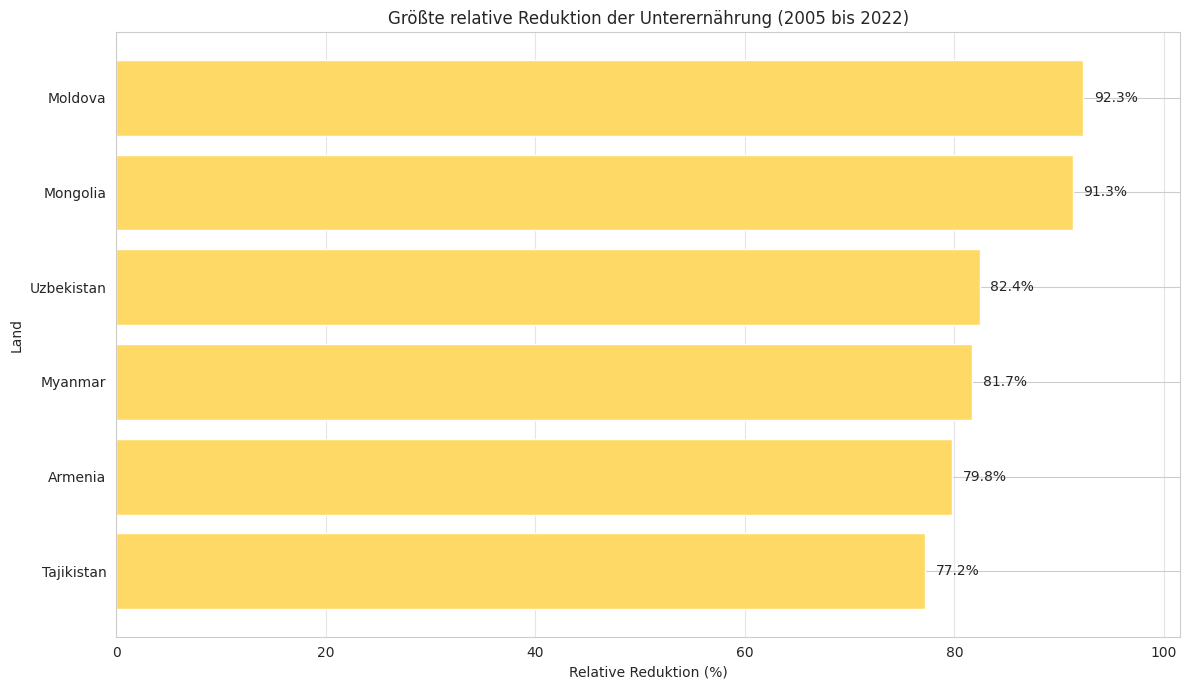

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df_plot_data = {
    'Entity': ['Tajikistan', 'Armenia', 'Myanmar', 'Uzbekistan', 'Mongolia', 'Moldova'],
    'Relative Reduction (%)': [77.2, 79.8, 81.7, 82.4, 91.3, 92.3]
}
df_plot = pd.DataFrame(df_plot_data).sort_values("Relative Reduction (%)", ascending=True)

plt.figure(figsize=(12, 7))

goldgelb = "#FFD966"  

bars = plt.barh(df_plot["Entity"], df_plot["Relative Reduction (%)"], color=goldgelb)

plt.title("Größte relative Reduktion der Unterernährung (2005 bis 2022)")
plt.xlabel("Relative Reduktion (%)")
plt.ylabel("Land")
plt.grid(axis='x', alpha=0.5)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left', va='center')

plt.xlim(0, df_plot["Relative Reduction (%)"].max() * 1.1)
plt.tight_layout()
plt.show()

Dieses Diagramm zeigt die Relative Reduktion in % an der Länder mit der Meisten Reduktion über die Jahre 2005- 2022. 

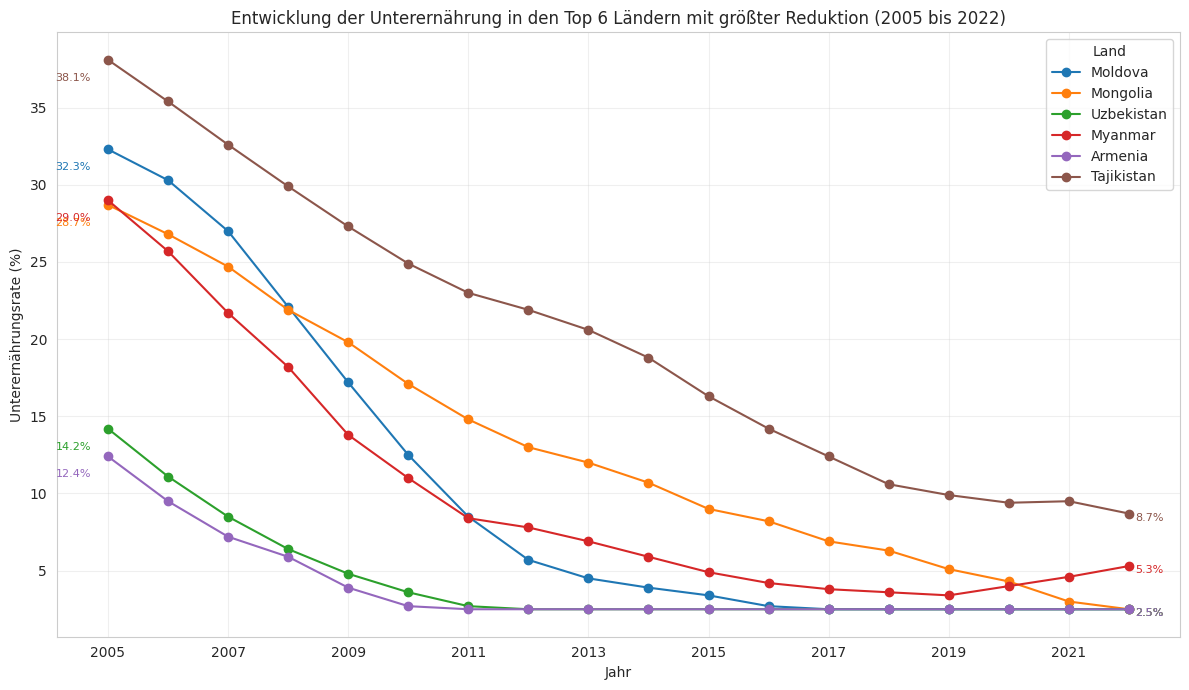

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_name = "prevalence-of-undernourishment.csv"
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Fehler: Datei {file_name} nicht gefunden. Bitte stellen Sie sicher, dass die Datei im aktuellen Verzeichnis liegt.")
    exit()

old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

YEAR_END = df_countries["Year"].max()  
YEAR_START = 2005

df_start = df_countries[df_countries["Year"] == YEAR_START][["Entity", "Prevalence (%)"]].rename(columns={"Prevalence (%)": "Rate_2005"})
df_end = df_countries[df_countries["Year"] == YEAR_END][["Entity", "Prevalence (%)"]].rename(columns={"Prevalence (%)": "Rate_2022"})
df_comparison = pd.merge(df_start, df_end, on="Entity", how="inner")
df_comparison["Absolute Reduction (%)"] = df_comparison["Rate_2005"] - df_comparison["Rate_2022"]
df_comparison_filtered = df_comparison[df_comparison["Rate_2005"] > 0].copy()
df_comparison_filtered["Relative Reduction (%)"] = (
    (df_comparison_filtered["Rate_2005"] - df_comparison_filtered["Rate_2022"]) / df_comparison_filtered["Rate_2005"]
) * 100

df_top_improvements = df_comparison_filtered.sort_values("Relative Reduction (%)", ascending=False).head(10)
df_top_improvements = df_top_improvements[df_top_improvements["Absolute Reduction (%)"] > 5].head(6)
IMPROVED_COUNTRIES = df_top_improvements['Entity'].tolist()

df_plot_lines = df_countries[
    (df_countries["Entity"].isin(IMPROVED_COUNTRIES)) & 
    (df_countries["Year"] >= YEAR_START) & 
    (df_countries["Year"] <= YEAR_END)
].sort_values("Year")

fig, ax = plt.subplots(figsize=(12, 7))
colors = plt.colormaps['tab10']

for i, country in enumerate(IMPROVED_COUNTRIES):
    country_data = df_plot_lines[df_plot_lines["Entity"] == country]
    line_color = colors(i)

    ax.plot(country_data["Year"], country_data["Prevalence (%)"], marker='o', label=country, color=line_color)

    rate_start = country_data[country_data["Year"] == YEAR_START]["Prevalence (%)"].iloc[0]
    rate_end = country_data[country_data["Year"] == YEAR_END]["Prevalence (%)"].iloc[0]

    ax.annotate(f'{rate_start:.1f}%',
                (YEAR_START, rate_start),
                textcoords="offset points", xytext=(-25, -15), ha='center', fontsize=8, color=line_color)

    ax.annotate(f'{rate_end:.1f}%',
                (YEAR_END, rate_end),
                textcoords="offset points", xytext=(15, -5), ha='center', fontsize=8, color=line_color)


ax.set_title(f"Entwicklung der Unterernährung in den Top 6 Ländern mit größter Reduktion ({YEAR_START} bis {YEAR_END})")
ax.set_xlabel("Jahr")
ax.set_ylabel("Unterernährungsrate (%)")
ax.legend(loc='upper right', title="Land")
ax.grid(True, alpha=0.3)

ax.set_xticks(range(YEAR_START, YEAR_END + 1, 2))
plt.tight_layout()
plt.show()

#### Analyse und Interpretation zur Fragestellung 5

**Aufgezeigte Länder:**

- Moldova	Relative Reduktion: 92,3%
- Mongolia	Relative Reduktion: 91,3%
- Uzbekistan Relative Reduktion: 82,4%
- Myanmar Relative Reduktion: 81,7%
- Armenia Relative Reduktion: 79,8%
- Tajikistan Relative Reduktion: 77,2%

Die Verbesserung in den zentralasiatischen und Kaukasusländern (Moldova, Mongolei, Usbekistan, Armenien, Tadschikistan) ist Teil eines breiteren regionalen Trends. 

**1. Wirtschaftliche Transformation und Armutsbekämpfung:**

Post-Sowjetische Erholung: Viele dieser Länder erlebten in den 1990er Jahren nach dem Zerfall der Sowjetunion schwere Wirtschaftskrisen und eine Zunahme der Unterernährung. Die massive Reduktion ab Mitte der 2000er Jahre ist eng mit der wirtschaftlichen Stabilisierung und dem Wirtschaftswachstum in der Region verbunden, welches die Armut reduzierte und die Kaufkraft erhöhte.

**2. Gezielte Agrar- und Sozialpolitik:**

Landwirtschaftliche Reformen: Insbesondere die zentralasiatischen Länder (Usbekistan, Tadschikistan) und die Mongolei setzten auf Reformen in der Landwirtschaft und im Handel. Die Verbesserung der Agrarhandelsbilanzen und die Stärkung der Agrar- und Ernährungssysteme spielen eine wichtige Rolle bei der Reduzierung des Hungers.

**3. Regionale Stabilität:** 

Die Fähigkeit dieser Länder, in den Jahren 2005 bis 2022 substanzielle Fortschritte zu erzielen, hängt stark damit zusammen, dass die meisten der genannten Länder (im Gegensatz zu Krisenherden wie Yemen oder Somalia) keine grossflächigen, die gesamte Lebensmittelversorgungskette störenden Konflikte erlebt haben, was Investitionen und politische Kontinuität ermöglichte.

**Datenquellen:**

- https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
- https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2020.00453/full
- https://ourworldindata.org/hunger-and-undernourishment